## Load data with RDD

In [63]:
rdd1 = sc.textFile('real_estate_db.csv')
rdd1.first()

'UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced'

In [64]:
rdd_head= rdd1.first()

In [65]:
rdd_head= rdd1.first()
rdd2 = rdd1.filter(lambda line:line!=rdd_head)
rdd2.first()

'00220336,,140,016,02,Alaska,AK,Unalaska,Unalaska City,City,tract,99685,907,53.6210913,-166.7709793,2823180154,3101986247,4619,2725,1894,1366.24657,1405,650.1638,131.50967,372,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807,70691.05352,329.85389,874,114330.20465,101229,63955.77136,161.15239,519,2266.22562,2283,768.53497,41.65644,155,840.67205,776,341.8558,58,29.74375,0.00469,0.01408,0.02817,0.7277,0.50216,0.77143,0.30304,0.82841,0.82784,0.8294,38.45838,39.25,17.65453,709.06255,2725,32.78177,31.91667,19.31875,440.46429,1894,0.25053,0.47388,0.30134,0.03443,0.09802'

In [66]:
rdd2.map(lambda line:line.split(',')).take(1)

[['00220336',
  '',
  '140',
  '016',
  '02',
  'Alaska',
  'AK',
  'Unalaska',
  'Unalaska City',
  'City',
  'tract',
  '99685',
  '907',
  '53.6210913',
  '-166.7709793',
  '2823180154',
  '3101986247',
  '4619',
  '2725',
  '1894',
  '1366.24657',
  '1405',
  '650.1638',
  '131.50967',
  '372',
  '0.85676',
  '0.65676',
  '0.47838',
  '0.35405',
  '0.28108',
  '0.21081',
  '0.15135',
  '0.12432',
  '661',
  '370',
  '107394.63092',
  '92807',
  '70691.05352',
  '329.85389',
  '874',
  '114330.20465',
  '101229',
  '63955.77136',
  '161.15239',
  '519',
  '2266.22562',
  '2283',
  '768.53497',
  '41.65644',
  '155',
  '840.67205',
  '776',
  '341.8558',
  '58',
  '29.74375',
  '0.00469',
  '0.01408',
  '0.02817',
  '0.7277',
  '0.50216',
  '0.77143',
  '0.30304',
  '0.82841',
  '0.82784',
  '0.8294',
  '38.45838',
  '39.25',
  '17.65453',
  '709.06255',
  '2725',
  '32.78177',
  '31.91667',
  '19.31875',
  '440.46429',
  '1894',
  '0.25053',
  '0.47388',
  '0.30134',
  '0.03443',
  

### give blockid,sumlevel,type when state = Alaska

In [67]:
(rdd2.filter(lambda line:line.split(',')[5] in ['Alaska','Georgia']).
 map(lambda line:(line.split(',')[0],
                 line.split(',')[1],
                 line.split(',')[2],
                 line.split(',')[5])).take(5))

[('00220336', '', '140', 'Alaska'),
 ('00220342', '', '140', 'Alaska'),
 ('00220343', '', '140', 'Alaska'),
 ('00220345', '', '140', 'Alaska'),
 ('00220347', '', '140', 'Alaska')]

## Load Dataset into a Dataframe

In [6]:
df = spark.read.option('header','true').option('inferSchema','true').csv("real_estate_db.csv")

### print the column names

In [3]:
print(df.columns)

['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_s

### Count no of instances/rows in the dataset

In [3]:
print(df.count())

39030


### See the records of the table

In [5]:
df.take(1)

[Row(UID=220336, BLOCKID=None, SUMLEVEL=140, COUNTYID=16, STATEID=2, state='Alaska', state_ab='AK', city='Unalaska', place='Unalaska City', type='City', primary='tract', zip_code=99685, area_code=907, lat=53.6210913, lng=-166.7709793, ALand=2823180154, AWater=3101986247, pop=4619, male_pop=2725, female_pop=1894, rent_mean=1366.24657, rent_median=1405.0, rent_stdev=650.1638, rent_sample_weight=131.50967, rent_samples=372.0, rent_gt_10=0.85676, rent_gt_15=0.65676, rent_gt_20=0.47838, rent_gt_25=0.35405, rent_gt_30=0.28108, rent_gt_35=0.21081, rent_gt_40=0.15135, rent_gt_50=0.12432, universe_samples=661, used_samples=370, hi_mean=107394.63092, hi_median=92807.0, hi_stdev=70691.05352, hi_sample_weight=329.85389, hi_samples=874.0, family_mean=114330.20465, family_median=101229.0, family_stdev=63955.77136, family_sample_weight=161.15239, family_samples=519.0, hc_mortgage_mean=2266.22562, hc_mortgage_median=2283.0, hc_mortgage_stdev=768.53497, hc_mortgage_sample_weight=41.65644, hc_mortgage_s

In [6]:
df.show(2)

+------+-------+--------+--------+-------+------+--------+-----------+-------------+----+-------+--------+---------+----------+------------+----------+----------+----+--------+----------+----------+-----------+----------+------------------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------------+------------+------------+---------+-----------+----------------+----------+------------+-------------+------------+--------------------+--------------+----------------+------------------+-----------------+-------------------------+-------------------+---------+---------+---------+----------+----------------+---------------------------+---------------+-----------+-------+-------------------+---------------+--------+---------+--------------+----------------+-------------+---------------+--------------+----------------------+----------------+---------------+-----------------+----------------+------------------------+------------------+-

In [7]:
df.limit(2)

DataFrame[UID: int, BLOCKID: string, SUMLEVEL: int, COUNTYID: int, STATEID: int, state: string, state_ab: string, city: string, place: string, type: string, primary: string, zip_code: int, area_code: int, lat: double, lng: double, ALand: bigint, AWater: bigint, pop: int, male_pop: int, female_pop: int, rent_mean: double, rent_median: double, rent_stdev: double, rent_sample_weight: double, rent_samples: double, rent_gt_10: double, rent_gt_15: double, rent_gt_20: double, rent_gt_25: double, rent_gt_30: double, rent_gt_35: double, rent_gt_40: double, rent_gt_50: double, universe_samples: int, used_samples: int, hi_mean: double, hi_median: double, hi_stdev: double, hi_sample_weight: double, hi_samples: double, family_mean: double, family_median: double, family_stdev: double, family_sample_weight: double, family_samples: double, hc_mortgage_mean: double, hc_mortgage_median: double, hc_mortgage_stdev: double, hc_mortgage_sample_weight: double, hc_mortgage_samples: double, hc_mean: double, hc

In [8]:
df.head(2)

[Row(UID=220336, BLOCKID=None, SUMLEVEL=140, COUNTYID=16, STATEID=2, state='Alaska', state_ab='AK', city='Unalaska', place='Unalaska City', type='City', primary='tract', zip_code=99685, area_code=907, lat=53.6210913, lng=-166.7709793, ALand=2823180154, AWater=3101986247, pop=4619, male_pop=2725, female_pop=1894, rent_mean=1366.24657, rent_median=1405.0, rent_stdev=650.1638, rent_sample_weight=131.50967, rent_samples=372.0, rent_gt_10=0.85676, rent_gt_15=0.65676, rent_gt_20=0.47838, rent_gt_25=0.35405, rent_gt_30=0.28108, rent_gt_35=0.21081, rent_gt_40=0.15135, rent_gt_50=0.12432, universe_samples=661, used_samples=370, hi_mean=107394.63092, hi_median=92807.0, hi_stdev=70691.05352, hi_sample_weight=329.85389, hi_samples=874.0, family_mean=114330.20465, family_median=101229.0, family_stdev=63955.77136, family_sample_weight=161.15239, family_samples=519.0, hc_mortgage_mean=2266.22562, hc_mortgage_median=2283.0, hc_mortgage_stdev=768.53497, hc_mortgage_sample_weight=41.65644, hc_mortgage_s

### show schema

In [9]:
df.printSchema()

root
 |-- UID: integer (nullable = true)
 |-- BLOCKID: string (nullable = true)
 |-- SUMLEVEL: integer (nullable = true)
 |-- COUNTYID: integer (nullable = true)
 |-- STATEID: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- state_ab: string (nullable = true)
 |-- city: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- primary: string (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- area_code: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- ALand: long (nullable = true)
 |-- AWater: long (nullable = true)
 |-- pop: integer (nullable = true)
 |-- male_pop: integer (nullable = true)
 |-- female_pop: integer (nullable = true)
 |-- rent_mean: double (nullable = true)
 |-- rent_median: double (nullable = true)
 |-- rent_stdev: double (nullable = true)
 |-- rent_sample_weight: double (nullable = true)
 |-- rent_samples: double (nullable = true)
 |-- rent

### select specific columns

In [10]:
df.select('UID').show(5)

+------+
|   UID|
+------+
|220336|
|220342|
|220343|
|220345|
|220347|
+------+
only showing top 5 rows



In [11]:
df1= df.select('UID','BLOCKID','SUMLEVEL').show(4)

+------+-------+--------+
|   UID|BLOCKID|SUMLEVEL|
+------+-------+--------+
|220336|   null|     140|
|220342|   null|     140|
|220343|   null|     140|
|220345|   null|     140|
+------+-------+--------+
only showing top 4 rows



## Drop Duplications

In [7]:
df = df.dropDuplicates()

In [3]:
df.count()

38715

## Droping colums

### drop unique id columns because having unique no in all the rows which will not be useful for our analysis

In [3]:
df.select('UID').distinct().count()

38715

#### Droping UID because having unique id for all the coulmns

In [8]:
df = df.drop('UID')

### Droping BLOCKID since it is null for all the rows

In [19]:
from pyspark.sql.functions import count

df.groupBy('BLOCKID').count().show()

+-------+-----+
|BLOCKID|count|
+-------+-----+
|   null|38715|
+-------+-----+



In [9]:
df = df.drop('BLOCKID')

### Droping SUMLEVEL and primary because it is constant through out the dataset

In [21]:
from pyspark.sql.functions import count

df.groupBy('SUMLEVEL').count().show()

+--------+-----+
|SUMLEVEL|count|
+--------+-----+
|     140|38715|
+--------+-----+



In [22]:
from pyspark.sql.functions import count

df.groupBy('primary').count().show()

+-------+-----+
|primary|count|
+-------+-----+
|  tract|38715|
+-------+-----+



In [10]:
df = df.drop('SUMLEVEL','primary')

### drop columns which are not used

In [11]:
df = df.drop('rent_median','rent_stdev','rent_samples','rent_sample_weight','rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50')

In [12]:
df = df.drop('hi_median','hi_stdev','hi_sample_weight','hi_samples')

In [13]:
df = df.drop('family_median','family_stdev','family_samples','family_sample_weight')

In [14]:
df = df.drop('hc_mortgage_median','hc_mortgage_stdev','hc_mortgage_sample_weight','hc_mortgage_samples')

In [15]:
df = df.drop('hc_median','hc_stdev','hc_sample_weight','hc_samples')

In [16]:
df = df.drop('second_mortgage_cdf','home_equity_cdf','debt_cdf')

In [17]:
df = df.drop('male_age_median','male_age_stdev','male_age_sample_weight','male_age_samples')

In [18]:
df = df.drop('female_age_median','female_age_stdev','female_age_sample_weight','female_age_samples')

In [19]:
df = df.drop('state_ab','zip_code','area_code')

In [20]:
df = df.drop('universe_samples','used_samples')

In [21]:
df = df.drop('married_snp','STATEID','COUNTYID')

In [22]:
print(len(df.columns))

29


In [26]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- city: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- ALand: long (nullable = true)
 |-- AWater: long (nullable = true)
 |-- pop: integer (nullable = true)
 |-- male_pop: integer (nullable = true)
 |-- female_pop: integer (nullable = true)
 |-- rent_mean: double (nullable = true)
 |-- hi_mean: double (nullable = true)
 |-- family_mean: double (nullable = true)
 |-- hc_mortgage_mean: double (nullable = true)
 |-- hc_mean: double (nullable = true)
 |-- home_equity_second_mortgage: double (nullable = true)
 |-- second_mortgage: double (nullable = true)
 |-- home_equity: double (nullable = true)
 |-- debt: double (nullable = true)
 |-- hs_degree: double (nullable = true)
 |-- hs_degree_male: double (nullable = true)
 |-- hs_degree_female: double (nullable = true)
 |-- male_age_mean: double (nullable = true)
 |-- female_a

## RDD Functions- create dataframe from RDD

In [8]:
from pyspark import SparkContext, SparkConf
# create Spark context with Spark configuration
#conf = SparkConf().setAppName("Read Text to RDD - Python")
#sc = SparkContext(conf=conf)
 
# read input text file to RDD
rdd = sc.textFile("real_estate_db.csv")
rdd.take(2)

['UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced',
 '00220336,,

### changing Rdd to dataframe
RDD (Resilient Distributed Dataset). The main approach to work with unstructured data. Pretty similar to a distributed collection that is not always typed.
Datasets. The main approach to work with semi-structured and structured data. Typed distributed collection, type-safety at a compile time, strong typing, lambda functions.
DataFrames. It is the Dataset organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood. Think about it as a table in a relational database.
RDD

your data is unstructured, for example, binary (media) streams or text streams you want to control your dataset and use low-level transformations and actions your data types cannot be serialized with Encoders (an optimized approach that uses runtime code generation to build custom bytecode for serialization and deserialization) you are ok to miss optimizations for DataFrames and Datasets for structured and semi-structured data that are available out of the box you don’t care about the schema, columnar format and ready to use functional programming constructs
DataFrame

your data is structured (RDBMS input) or semi-structured (json, csv) you want to get the best performance gained from SQL’s optimized execution engine (Catalyst optimizer and Tungsten’s efficient code generation) you need to run hive queries you appreciate domain specific language API (.groupBy, .agg, .orderBy) you are using R or Python


In [9]:
#dfFromRDD1 = rdd.toDF()

df = spark.createDataFrame(rdd)

### Internal workings of an RDD

In [23]:
#Creating the RDD
rdd = sc.textFile("real_estate_db.csv")
#Reading the RDD
rdd.take(2)

['UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced',
 '00220336,,

In [11]:
rdd.first()

'UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced'

In [13]:
rdd_head= rdd.first()
rdd1 = rdd.filter(lambda line:line!=rdd_head)
rdd1.first()

'00220336,,140,016,02,Alaska,AK,Unalaska,Unalaska City,City,tract,99685,907,53.6210913,-166.7709793,2823180154,3101986247,4619,2725,1894,1366.24657,1405,650.1638,131.50967,372,0.85676,0.65676,0.47838,0.35405,0.28108,0.21081,0.15135,0.12432,661,370,107394.63092,92807,70691.05352,329.85389,874,114330.20465,101229,63955.77136,161.15239,519,2266.22562,2283,768.53497,41.65644,155,840.67205,776,341.8558,58,29.74375,0.00469,0.01408,0.02817,0.7277,0.50216,0.77143,0.30304,0.82841,0.82784,0.8294,38.45838,39.25,17.65453,709.06255,2725,32.78177,31.91667,19.31875,440.46429,1894,0.25053,0.47388,0.30134,0.03443,0.09802'

In [14]:
rdd.map(lambda line:line.split(',')).take(1)

[['UID',
  'BLOCKID',
  'SUMLEVEL',
  'COUNTYID',
  'STATEID',
  'state',
  'state_ab',
  'city',
  'place',
  'type',
  'primary',
  'zip_code',
  'area_code',
  'lat',
  'lng',
  'ALand',
  'AWater',
  'pop',
  'male_pop',
  'female_pop',
  'rent_mean',
  'rent_median',
  'rent_stdev',
  'rent_sample_weight',
  'rent_samples',
  'rent_gt_10',
  'rent_gt_15',
  'rent_gt_20',
  'rent_gt_25',
  'rent_gt_30',
  'rent_gt_35',
  'rent_gt_40',
  'rent_gt_50',
  'universe_samples',
  'used_samples',
  'hi_mean',
  'hi_median',
  'hi_stdev',
  'hi_sample_weight',
  'hi_samples',
  'family_mean',
  'family_median',
  'family_stdev',
  'family_sample_weight',
  'family_samples',
  'hc_mortgage_mean',
  'hc_mortgage_median',
  'hc_mortgage_stdev',
  'hc_mortgage_sample_weight',
  'hc_mortgage_samples',
  'hc_mean',
  'hc_median',
  'hc_stdev',
  'hc_samples',
  'hc_sample_weight',
  'home_equity_second_mortgage',
  'second_mortgage',
  'home_equity',
  'debt',
  'second_mortgage_cdf',
  'home_eq

### give blockid,sumlevel,type when state = Alaska

In [15]:
(rdd.filter(lambda line:line.split(',')[5] == 'Alaska').
 map(lambda line:(line.split(',')[0],
                 line.split(',')[1],
                 line.split(',')[2],
                 line.split(',')[5])).take(5))

[('00220336', '', '140', 'Alaska'),
 ('00220342', '', '140', 'Alaska'),
 ('00220343', '', '140', 'Alaska'),
 ('00220345', '', '140', 'Alaska'),
 ('00220347', '', '140', 'Alaska')]

In [16]:
(rdd.filter(lambda line:line.split(',')[5] in ['Alaska','Georgia']).
 map(lambda line:(line.split(',')[0],
                 line.split(',')[1],
                 line.split(',')[2],
                 line.split(',')[5])).take(5))

[('00220336', '', '140', 'Alaska'),
 ('00220342', '', '140', 'Alaska'),
 ('00220343', '', '140', 'Alaska'),
 ('00220345', '', '140', 'Alaska'),
 ('00220347', '', '140', 'Alaska')]

### Describe Function

In [19]:
df.describe('lat').show()

+-------+------------------+
|summary|               lat|
+-------+------------------+
|  count|             38715|
|   mean|37.489506993839605|
| stddev| 5.596548066309279|
|    min|        17.9290851|
|    max|        67.0740175|
+-------+------------------+



## Missing value

### Filling the Null values with 

In [24]:
df = df.fillna(0)

### Percentage of missing value

In [37]:
total = df.count()
for col in df.columns:
    df_filter = (df.filter(df[col]=="0")).count()
    percen_filter = df_filter/total
    print(col, "\t", "with ‘0’ values: ", percen_filter)

state 	 with ‘0’ values:  0.0
city 	 with ‘0’ values:  0.0
place 	 with ‘0’ values:  0.0
type 	 with ‘0’ values:  0.0
lat 	 with ‘0’ values:  0.0
lng 	 with ‘0’ values:  0.0
ALand 	 with ‘0’ values:  0.0
AWater 	 with ‘0’ values:  0.38519953506392873
pop 	 with ‘0’ values:  0.004778509621593698
male_pop 	 with ‘0’ values:  0.005010977657238796
female_pop 	 with ‘0’ values:  0.00545008394679065
rent_mean 	 with ‘0’ values:  0.00826553015627018
hi_mean 	 with ‘0’ values:  0.006999870851091309
family_mean 	 with ‘0’ values:  0.007826423866718326
hc_mortgage_mean 	 with ‘0’ values:  0.015368720134314865
hc_mean 	 with ‘0’ values:  0.01653106031254036
home_equity_second_mortgage 	 with ‘0’ values:  0.2332945886607258
second_mortgage 	 with ‘0’ values:  0.19966421283740152
home_equity 	 with ‘0’ values:  0.0665116879762366
debt 	 with ‘0’ values:  0.015368720134314865
hs_degree 	 with ‘0’ values:  0.004985147875500452
hs_degree_male 	 with ‘0’ values:  0.005398424383313961
hs_degree_female 	

### Print missing columns

In [20]:
missing_col =[]
for col in df.columns:
    df_filter = (df.filter(df[col]=="0")).count()
    if(df_filter > 0):
        missing_col.append(col)
print(missing_col)

['AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'hi_mean', 'family_mean', 'hc_mortgage_mean', 'hc_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'female_age_mean', 'pct_own', 'married', 'separated', 'divorced']


## How to fill missing values using mean of the column of PySpark Dataframe
## <https://medium.com/@aieeshashafique/exploratory-data-analysis-using-pyspark-dataframe-in-python-bd55c02a2852

### define your custom function for the mean of the numeric column of the pyspark dataframe.

In [39]:
#Find the avg of all numeric columns
from pyspark.sql.functions import avg

def find_columns_fill_mean(df, num_col, verbose=False):
    col_with_mean=[]
    for col in num_col:
        mean_value = df.select(avg(df[col]))
        avg_col = mean_value.columns[0]
        result = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        if (verbose==True): print(mean_value.columns[0], "\t", result[0])
        col_with_mean.append([col, result[0]])    
    return col_with_mean

In [40]:
print(col, "\t", "mean values: ",  find_columns_fill_mean(df,missing_col))

divorced 	 mean values:  [['AWater', 6144408.759834689], ['pop', 4344.563580007749], ['male_pop', 2136.825184037195], ['female_pop', 2207.738395970554], ['rent_mean', 1046.1010459418835], ['hi_mean', 69955.49093368076], ['family_mean', 78370.33168289994], ['hc_mortgage_mean', 1606.0487613033706], ['hc_mean', 531.2880015376471], ['home_equity_second_mortgage', 0.02537785122045718], ['second_mortgage', 0.029632937621077122], ['home_equity', 0.09983200103319129], ['debt', 0.6223142820612165], ['hs_degree', 0.8538958439881182], ['hs_degree_male', 0.8471570233759526], ['hs_degree_female', 0.8596712323388869], ['male_age_mean', 38.13408689913471], ['female_age_mean', 40.08259130982822], ['pct_own', 0.6365622825778121], ['married', 0.5061182921348315], ['separated', 0.01901723053080203], ['divorced', 0.09960359731370264]]


In [41]:
#### fill the missing values with the mean of the numeric columns.

In [56]:
#Fill missing values for mean
from pyspark.sql.functions import when, lit

def fill_missing_value_with_mean(df, numeric_cols):
    col_mean = mean_of_pyspark_columns(df, numeric_cols) 
    
    for col, mean in col_mean:
        df = df.withColumn(col, when(df[col]== 0, lit(mean)).otherwise(df[col]))
        
    return df

In [44]:
###Now this is the time to literally consume the fill_missing_with_mean###

In [75]:
df_mean_filter1 = fill_missing_value_with_mean(df, missing_col)

In [77]:
missing_col =[]
for col in df_mean_filter1.columns:
    df_filter = (df_mean_filter1.filter(df_mean_filter1[col]=="0")).count()
    if(df_filter > 0):
        missing_col.append(col)
print(missing_col)

[]


In [78]:
1+2

3

In [83]:
total = df_mean_filter1.count()
for col in df_mean_filter1.columns:
    df_filter = (df_mean_filter1.filter(df_mean_filter1[col]=="0")).count()
    percen_filter = df_filter/total
    print(col, "\t", "with ‘0’ values: ", percen_filter)

state 	 with ‘0’ values:  0.0
city 	 with ‘0’ values:  0.0
place 	 with ‘0’ values:  0.0
type 	 with ‘0’ values:  0.0
lat 	 with ‘0’ values:  0.0
lng 	 with ‘0’ values:  0.0
ALand 	 with ‘0’ values:  0.0
AWater 	 with ‘0’ values:  0.0
pop 	 with ‘0’ values:  0.0
male_pop 	 with ‘0’ values:  0.0
female_pop 	 with ‘0’ values:  0.0
rent_mean 	 with ‘0’ values:  0.0
hi_mean 	 with ‘0’ values:  0.0
family_mean 	 with ‘0’ values:  0.0
hc_mortgage_mean 	 with ‘0’ values:  0.0
hc_mean 	 with ‘0’ values:  0.0
home_equity_second_mortgage 	 with ‘0’ values:  0.0
second_mortgage 	 with ‘0’ values:  0.0
home_equity 	 with ‘0’ values:  0.0
debt 	 with ‘0’ values:  0.0
hs_degree 	 with ‘0’ values:  0.0
hs_degree_male 	 with ‘0’ values:  0.0
hs_degree_female 	 with ‘0’ values:  0.0
male_age_mean 	 with ‘0’ values:  0.0
female_age_mean 	 with ‘0’ values:  0.0
pct_own 	 with ‘0’ values:  0.0
married 	 with ‘0’ values:  0.0
separated 	 with ‘0’ values:  0.0
divorced 	 with ‘0’ values:  0.0


In [ ]:
##It is creating a folder with multiple files, because each partition is saved individually. If you need a single output file (still in a folder) you can repartition (preferred if upstream data is large, but requires a shuffle):

In [88]:
df_mean_filter1 = df_mean_filter1.repartition(1)

In [90]:
df_mean_filter1 = df_mean_filter1.repartition(1)
df_mean_filter1.write.csv('mean_fill_dataset_new.csv',header=True) 

## missing value-KNN implementation

### How to fill missing values using mode of the column of PySpark Dataframe

In [25]:
testDF1 = df.replace(0, None)

In [23]:
for col in testDF1.columns:
    df_filter1 = (testDF1.filter(testDF1[col]== 0)).count()
    print(col, "\t", "with ‘0’ values: ", df_filter1)

state 	 with ‘0’ values:  0
city 	 with ‘0’ values:  0
place 	 with ‘0’ values:  0
type 	 with ‘0’ values:  0
lat 	 with ‘0’ values:  0
lng 	 with ‘0’ values:  0
ALand 	 with ‘0’ values:  0
AWater 	 with ‘0’ values:  0
pop 	 with ‘0’ values:  0
male_pop 	 with ‘0’ values:  0
female_pop 	 with ‘0’ values:  0
rent_mean 	 with ‘0’ values:  0
hi_mean 	 with ‘0’ values:  0
family_mean 	 with ‘0’ values:  0
hc_mortgage_mean 	 with ‘0’ values:  0
hc_mean 	 with ‘0’ values:  0
home_equity_second_mortgage 	 with ‘0’ values:  0
second_mortgage 	 with ‘0’ values:  0
home_equity 	 with ‘0’ values:  0
debt 	 with ‘0’ values:  0
hs_degree 	 with ‘0’ values:  0
hs_degree_male 	 with ‘0’ values:  0
hs_degree_female 	 with ‘0’ values:  0
male_age_mean 	 with ‘0’ values:  0
female_age_mean 	 with ‘0’ values:  0
pct_own 	 with ‘0’ values:  0
married 	 with ‘0’ values:  0
separated 	 with ‘0’ values:  0
divorced 	 with ‘0’ values:  0


In [32]:

for col in testDF1.columns:
    df_filter1 = (testDF1.filter(testDF1[col]== "NaN")).count()
    df_filter2 = (testDF1.filter(testDF1[col]== np.nan)).count()
    print(col, "\t", "with ‘0’ values: ", df_filter1 + df_filter2)

lat 	 with ‘0’ values:  0
lng 	 with ‘0’ values:  0
ALand 	 with ‘0’ values:  0
AWater 	 with ‘0’ values:  0
pop 	 with ‘0’ values:  0
male_pop 	 with ‘0’ values:  0
female_pop 	 with ‘0’ values:  0
rent_mean 	 with ‘0’ values:  640
hi_mean 	 with ‘0’ values:  542
family_mean 	 with ‘0’ values:  606
hc_mortgage_mean 	 with ‘0’ values:  1190
hc_mean 	 with ‘0’ values:  1280
home_equity_second_mortgage 	 with ‘0’ values:  974
second_mortgage 	 with ‘0’ values:  974
home_equity 	 with ‘0’ values:  974
debt 	 with ‘0’ values:  974
hs_degree 	 with ‘0’ values:  384
hs_degree_male 	 with ‘0’ values:  410
hs_degree_female 	 with ‘0’ values:  458
male_age_mean 	 with ‘0’ values:  388
female_age_mean 	 with ‘0’ values:  422
pct_own 	 with ‘0’ values:  542
married 	 with ‘0’ values:  392
separated 	 with ‘0’ values:  392
divorced 	 with ‘0’ values:  392


In [21]:
#testDF1.show()

In [26]:
#https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/

#Load KNNImputer 
from sklearn.impute import KNNImputer


In [27]:
#Load KNNImputer 
from sklearn.impute import KNNImputer
#2. Initialize KNNImputer
#You can define your own n_neighbors value (as its typical of KNN algorithm).
imputer = KNNImputer(n_neighbors=2)



#### 
How does it work?
According scikit-learn docs:

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors.

In [28]:
import numpy as np
testDF1 = testDF1.drop('state','city','place','type')
new_df= testDF1.collect()


In [29]:
# Impute/Fill Missing Values

#missed_df = testDF1.drop('state','city','place','type')
#missed_df = testDF1.collect()

df_knn_filter = imputer.fit_transform(new_df[:3000])

In [30]:
print(df_knn_filter)

[[ 3.44574952e+01 -8.56352140e+01  9.13714300e+07 ...  5.90020000e-01
   2.42100000e-02  1.38680000e-01]
 [ 3.12688350e+01 -8.52759901e+01  1.42938740e+08 ...  5.66780000e-01
   3.20400000e-02  1.12370000e-01]
 [ 3.34866689e+01 -8.68173266e+01  2.42284900e+06 ...  2.97580000e-01
   1.92200000e-02  6.63400000e-02]
 ...
 [ 3.88098033e+01 -7.68691578e+01  1.79066860e+07 ...  7.87350000e-01
   1.20000000e-02  8.72000000e-03]
 [ 4.30672253e+01 -8.45338429e+01  9.11074510e+07 ...  6.38170000e-01
   1.04200000e-02  5.03500000e-02]
 [ 4.30187659e+01 -8.37072465e+01  1.49190800e+06 ...  2.79190000e-01
   1.86100000e-02  8.62900000e-02]]


In [ ]:
## change Array to Dataframe

In [38]:
import pandas as pd
knn_fillet_data = pd.DataFrame({'lat': df_knn_filter[:, 0], 'lng': df_knn_filter[:, 1],'ALand': df_knn_filter[:, 2], 'AWater': df_knn_filter[:, 3],
                        'pop': df_knn_filter[:, 4], 'male_pop': df_knn_filter[:, 5],'female_pop': df_knn_filter[:, 6], 'rent_mean': df_knn_filter[:, 7],
                        'hi_mean': df_knn_filter[:, 8], 'family_mean': df_knn_filter[:, 9],'hc_mortgage_mean': df_knn_filter[:, 10], 'hc_mean': df_knn_filter[:, 11],
                        'home_equity_second_storage': df_knn_filter[:, 12], 'second_mortgage': df_knn_filter[:, 13],'home_equity': df_knn_filter[:, 14], 'debt': df_knn_filter[:, 15],
                        'hs_degree': df_knn_filter[:, 16], 'hs_degree_male': df_knn_filter[:, 17],'hs_degree_female': df_knn_filter[:, 18], 'male_age_mean': df_knn_filter[:, 19],
                        'female_age_mean': df_knn_filter[:, 20], 'pct_own': df_knn_filter[:, 21],'married': df_knn_filter[:, 22], 'separated': df_knn_filter[:, 23],'divorced': df_knn_filter[:, 24]})

In [39]:
print(knn_fillet_data)

            lat        lng        ALand      AWater     pop  male_pop  \
0     34.457495 -85.635214   91371430.0     86324.0  5671.0    2754.0   
1     31.268835 -85.275990  142938740.0    185385.0  5233.0    2501.0   
2     33.486669 -86.817327    2422849.0     13286.0  3441.0    1840.0   
3     30.782780 -88.212806   25915097.0     46015.0  2481.0    1173.0   
4     34.526705 -90.657532   16340512.0    365186.0  2362.0    1105.0   
...         ...        ...          ...         ...     ...       ...   
2995  38.567919 -75.944033  122421070.0  11797070.0  4753.0    2341.0   
2996  39.410304 -77.268909   27128095.0     42428.0  4448.0    2101.0   
2997  38.809803 -76.869158   17906686.0     91637.0  3226.0    1539.0   
2998  43.067225 -84.533843   91107451.0    706260.0  2097.0    1027.0   
2999  43.018766 -83.707246    1491908.0     17082.0  1334.0     695.0   

      female_pop   rent_mean       hi_mean   family_mean  ...      debt  \
0         2917.0   489.98072   43343.66173   549

In [40]:
knn_fillet_data.to_csv('mycsv_knn.csv')

## Drop Missing values

In [ ]:
df_filtered = df[df['AWater'] != 0] 
df_filtered = df_filtered[df_filtered['rent_mean'] != 0] 
df_filtered = df_filtered[df_filtered['hi_mean'] != 0] 
df_filtered = df_filtered[df_filtered['family_mean'] != 0] 
df_filtered = df_filtered[df_filtered['female_pop'] != 0] 
df_filtered = df_filtered[df_filtered['male_pop'] != 0] 
df_filtered = df_filtered[df_filtered['pop'] != 0] 
df_filtered = df_filtered[df_filtered['hc_mortgage_mean'] != 0]
df_filtered = df_filtered[df_filtered['hc_mean'] != 0]
df_filtered = df_filtered[df_filtered['home_equity_second_mortgage'] != 0]
df_filtered = df_filtered[df_filtered['second_mortgage'] != 0]
df_filtered = df_filtered[df_filtered['home_equity'] != 0]
df_filtered = df_filtered[df_filtered['debt'] != 0]
df_filtered = df_filtered[df_filtered['hs_degree'] != 0]
df_filtered = df_filtered[df_filtered['hs_degree_male'] != 0]
df_filtered = df_filtered[df_filtered['hs_degree_female'] != 0]
df_filtered = df_filtered[df_filtered['male_age_mean'] != 0]
df_filtered = df_filtered[df_filtered['female_age_mean'] != 0]
df_filtered = df_filtered[df_filtered['pct_own'] != 0]
df_filtered = df_filtered[df_filtered['separated'] != 0]
df_filtered = df_filtered[df_filtered['divorced'] != 0]
df_filtered = df_filtered[df_filtered['married'] != 0]

In [ ]:
print(df_filtered.count())

In [ ]:
for col in df_filtered.columns:
    df_filter = (df_filtered.filter(df_filtered[col]=="0")).count()
    df_filter1 = (df_filtered.filter(df_filtered[col]=="NaN")).count()
    print(col, "\t", "with ‘0’ values: ", df_filter + df_filter1)

In [ ]:
df_filtered.write.csv('drop_data.csv')

## GroupBy

In [41]:
df.groupBy('state').count().show()

+--------------------+-----+
|               state|count|
+--------------------+-----+
|                Utah|  326|
|              Hawaii|  170|
|           Minnesota|  696|
|                Ohio| 1530|
|            Arkansas|  361|
|              Oregon|  454|
|               Texas| 2733|
|        North Dakota|  110|
|        Pennsylvania| 1722|
|         Connecticut|  443|
|            Nebraska|  272|
|             Vermont|   94|
|              Nevada|  349|
|         Puerto Rico|  478|
|          Washington|  805|
|            Illinois| 1587|
|            Oklahoma|  550|
|District of Columbia|   96|
|            Delaware|  109|
|              Alaska|  105|
+--------------------+-----+
only showing top 20 rows



In [42]:
df.groupBy('city').count().show()

+-----------------+-----+
|             city|count|
+-----------------+-----+
|        Worcester|   24|
|          Jemison|    1|
|       Prattville|    3|
|          Hanover|   17|
|        Fairbanks|   13|
|     Harleysville|    3|
|            Tyler|   13|
|Kingsford Heights|    1|
|          Palermo|    3|
|          Newbern|    1|
|         Fredonia|    3|
| North Saint Paul|    1|
|      Santa Paula|    2|
|         Bluffton|    6|
|      Middlefield|    1|
|        Birchwood|    1|
|     Belle Plaine|    1|
|      Johnsonburg|    2|
|   West Sand Lake|    1|
|          Minster|    1|
+-----------------+-----+
only showing top 20 rows



In [43]:
df.groupBy('place').count().show()

+--------------------+-----+
|               place|count|
+--------------------+-----+
|      Rochester City|   61|
|Southwest Greensburg|    3|
|             Hanover|   12|
|       Euharlee City|    1|
|       Harrison City|    9|
|            Marumsco|    2|
|      Kingsford City|    1|
|           Worcester|    1|
| Jefferson City City|    4|
|     Greenfield City|   14|
|   Hollis Crossroads|    1|
|      Claremont City|    8|
|        Harleysville|    3|
| Peachtree City City|    3|
|           Ucon City|    1|
|   Kingsford Heights|    1|
|              Grimes|    2|
|          Noblestown|    1|
|             Newbern|    1|
|       West Glendive|    1|
+--------------------+-----+
only showing top 20 rows



In [44]:
df.groupBy('type').count().show()

+-------+-----+
|   type|count|
+-------+-----+
|  Urban|  478|
|Borough| 1722|
|    CDP| 5179|
|Village| 4551|
|   Town| 5260|
|   City|21525|
+-------+-----+



In [46]:
df.groupBy('state').count().orderBy('count',ascending=False).show(25)

+--------------+-----+
|         state|count|
+--------------+-----+
|    California| 4150|
|         Texas| 2733|
|      New York| 2518|
|       Florida| 2272|
|  Pennsylvania| 1722|
|      Illinois| 1587|
|          Ohio| 1530|
|      Michigan| 1458|
|North Carolina| 1162|
|       Georgia| 1065|
|    New Jersey| 1002|
|      Virginia| 1001|
|    Washington|  805|
|       Indiana|  800|
|       Arizona|  790|
|     Tennessee|  780|
| Massachusetts|  771|
|      Maryland|  753|
|      Missouri|  729|
|     Wisconsin|  729|
|     Minnesota|  696|
|      Colorado|  663|
|       Alabama|  612|
|     Louisiana|  605|
|      Kentucky|  569|
+--------------+-----+
only showing top 25 rows



In [47]:
df.groupBy('city').count().orderBy('count',ascending=False).show()

+------------+-----+
|        city|count|
+------------+-----+
|     Chicago|  407|
|    Brooklyn|  406|
| Los Angeles|  334|
|     Houston|  332|
|Philadelphia|  214|
| San Antonio|  197|
|   Baltimore|  193|
|   Las Vegas|  185|
|       Bronx|  170|
|       Miami|  166|
|     Phoenix|  162|
|      Dallas|  159|
|     Detroit|  156|
|    Columbus|  149|
|    New York|  148|
|   San Diego|  134|
| Springfield|  130|
|  Washington|  128|
|   Milwaukee|  124|
|Indianapolis|  123|
+------------+-----+
only showing top 20 rows



## Distinct

In [48]:
df.select('city').distinct().show()

+-----------------+
|             city|
+-----------------+
|        Worcester|
|          Jemison|
|       Prattville|
|          Hanover|
|        Fairbanks|
|     Harleysville|
|            Tyler|
|Kingsford Heights|
|          Palermo|
|          Newbern|
|         Fredonia|
| North Saint Paul|
|      Santa Paula|
|         Bluffton|
|      Middlefield|
|        Birchwood|
|     Belle Plaine|
|      Johnsonburg|
|   West Sand Lake|
|          Minster|
+-----------------+
only showing top 20 rows



In [50]:
df.select('city').distinct().count()

8172

In [51]:
df.select('state').distinct().count()

52

In [55]:
#collecting distinct value by order
from pyspark.sql.functions import col
df.select('type').distinct().orderBy(col('type')).show(6)


+-------+
|   type|
+-------+
|Borough|
|    CDP|
|   City|
|   Town|
|  Urban|
|Village|
+-------+



In [56]:
#percentage of city in alltypes
from pyspark.sql.functions import col
df.filter(col('type') == 'City').count() / df.select('type').count()

0.5559860519178613

we can conclude that in this geographical area city is around 56% and others are 44%.#### majority of people live in city than other types

In [57]:
# Top 10 States
df.groupby('state').count().orderBy('count',ascending= False).show(10)

+--------------+-----+
|         state|count|
+--------------+-----+
|    California| 4150|
|         Texas| 2733|
|      New York| 2518|
|       Florida| 2272|
|  Pennsylvania| 1722|
|      Illinois| 1587|
|          Ohio| 1530|
|      Michigan| 1458|
|North Carolina| 1162|
|       Georgia| 1065|
+--------------+-----+
only showing top 10 rows



## Built in function

In [58]:
from pyspark.sql import functions
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

### change the values of strings into lower case and uppercase and first 4 characters of the string

In [59]:
from pyspark.sql.functions import lower,upper,substring
df.select(lower(col('city')),upper(col('city')),substring(col('city'),1,4)).show(2)

+-----------+-----------+---------------------+
|lower(city)|upper(city)|substring(city, 1, 4)|
+-----------+-----------+---------------------+
| fort payne| FORT PAYNE|                 Fort|
|       webb|       WEBB|                 Webb|
+-----------+-----------+---------------------+
only showing top 2 rows



### Numeric Function

In [61]:
from pyspark.sql.functions import min,max
df.select(min(col('rent_mean')),max(col('rent_mean'))).show(2)

+--------------+--------------+
|min(rent_mean)|max(rent_mean)|
+--------------+--------------+
|           0.0|    3962.34229|
+--------------+--------------+



### Cache values

In [62]:
df.cache()

DataFrame[state: string, city: string, place: string, type: string, lat: double, lng: double, ALand: bigint, AWater: bigint, pop: int, male_pop: int, female_pop: int, rent_mean: double, hi_mean: double, family_mean: double, hc_mortgage_mean: double, hc_mean: double, home_equity_second_mortgage: double, second_mortgage: double, home_equity: double, debt: double, hs_degree: double, hs_degree_male: double, hs_degree_female: double, male_age_mean: double, female_age_mean: double, pct_own: double, married: double, separated: double, divorced: double]

### Describe Function

In [69]:
df.describe('type').show()

+-------+-------+
|summary|   type|
+-------+-------+
|  count|  38715|
|   mean|   null|
| stddev|   null|
|    min|Borough|
|    max|Village|
+-------+-------+



In [70]:
df.describe('rent_mean').show()

+-------+------------------+
|summary|         rent_mean|
+-------+------------------+
|  count|             38715|
|   mean|1046.1010459418835|
| stddev| 444.6464951235491|
|    min|               0.0|
|    max|        3962.34229|
+-------+------------------+



## SQL Queries

In [71]:
df.registerTempTable('data_table')
sqlContext.sql('select * from data_table').show(1)

+-------+----------+---------------+----+----------+----------+--------+------+----+--------+----------+---------+-----------+-----------+----------------+---------+---------------------------+---------------+-----------+-------+---------+--------------+----------------+-------------+---------------+-------+-------+---------+--------+
|  state|      city|          place|type|       lat|       lng|   ALand|AWater| pop|male_pop|female_pop|rent_mean|    hi_mean|family_mean|hc_mortgage_mean|  hc_mean|home_equity_second_mortgage|second_mortgage|home_equity|   debt|hs_degree|hs_degree_male|hs_degree_female|male_age_mean|female_age_mean|pct_own|married|separated|divorced|
+-------+----------+---------------+----+----------+----------+--------+------+----+--------+----------+---------+-----------+-----------+----------------+---------+---------------------------+---------------+-----------+-------+---------+--------------+----------------+-------------+---------------+-------+-------+---------

In [73]:
sqlContext.sql('select type from data_table').show(1)

+----+
|type|
+----+
|Town|
+----+
only showing top 1 row



In [74]:
sqlContext.sql('select distinct(type) from data_table').show()

+-------+
|   type|
+-------+
|  Urban|
|Borough|
|    CDP|
|Village|
|   Town|
|   City|
+-------+



In [77]:
sqlContext.sql('select max(rent_mean) from data_table').show()

+--------------+
|max(rent_mean)|
+--------------+
|    3962.34229|
+--------------+



## PySpark SQL

In [78]:
from pyspark.sql.functions import count

df.groupBy('type').count().show()

+-------+-----+
|   type|count|
+-------+-----+
|  Urban|  478|
|Borough| 1722|
|    CDP| 5179|
|Village| 4551|
|   Town| 5260|
|   City|21525|
+-------+-----+



In [79]:
#Filter PySpark Dataframe based on the Condition

df.filter(df['type']=="City").count()

21525

In [ ]:
#percentage of city in alltypes
from pyspark.sql.functions import count
from pyspark.sql.functions import col
df.filter(col('type') == 'City').count() / df.select('type').count()

### Getting Average

In [80]:
#Average
import pyspark.sql.functions as F
avg_rent = df.groupby().agg(F.avg('rent_mean')).cache()
avg_rent.show()

+------------------+
|    avg(rent_mean)|
+------------------+
|1046.1010459418835|
+------------------+



In [83]:
from pyspark.sql.functions import avg
# Another way of finding average
df.select(avg(df['rent_mean'])).show()

+------------------+
|    avg(rent_mean)|
+------------------+
|1046.1010459418835|
+------------------+



In [84]:
# Another way of finding average
df.groupBy().avg('rent_mean').collect()

[Row(avg(rent_mean)=1046.1010459418835)]

## Descriptive Statistics

In [85]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
bounds = {}
for col in numeric_features:
    quantiles = df.approxQuantile(
    col, [0.25, 0.75], 0.05
    )
    IQR = quantiles[1] - quantiles[0]
    bounds[col] = [
    quantiles[0] - 1.5 * IQR,
    quantiles[1] + 1.5 * IQR
    ]

In [86]:
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

### Skewness

In [87]:
df.agg({'rent_mean': 'skewness'}).show()

+-------------------+
|skewness(rent_mean)|
+-------------------+
| 1.3233952268881137|
+-------------------+



In [100]:
from pyspark.sql.functions import col, skewness, kurtosis
df.select(skewness(df.pop),kurtosis(df.pop)).show()

+-----------------+-----------------+
|    skewness(pop)|    kurtosis(pop)|
+-----------------+-----------------+
|2.073522916279963|19.42071614442881|
+-----------------+-----------------+



In [88]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
print(numeric_features)

['lat', 'lng', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'hi_mean', 'family_mean', 'hc_mortgage_mean', 'hc_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'female_age_mean', 'pct_own', 'married', 'separated', 'divorced']


## Exploratory Data Analysis

### Univariant Analysis

### Categorical Attributes

#### Describe

In [94]:
df_filtered = spark.read.option('header','true').option('inferSchema','true').csv("mean_fill_dataset_new.csv")

In [95]:
str_loc_cols = ['state','city','place','type']
df_filtered.select(str_loc_cols).describe().show()

+-------+-------+---------+-------------+-------+
|summary|  state|     city|        place|   type|
+-------+-------+---------+-------------+-------+
|  count|  38715|    38715|        38715|  38715|
|   mean|   null|     null|         null|   null|
| stddev|   null|     null|         null|   null|
|    min|Alabama|Abbeville|    Abbeville|Borough|
|    max|Wyoming|     Zuni|Zumbrota City|Village|
+-------+-------+---------+-------------+-------+



In [96]:
num_loc_cols = ['lat','lng']
df_filtered.select(num_loc_cols).describe().show()

+-------+-----------------+------------------+
|summary|              lat|               lng|
+-------+-----------------+------------------+
|  count|            38715|             38715|
|   mean|37.48950699383958|-91.30796105385792|
| stddev|5.596548066309222|16.348231992289445|
|    min|       17.9290851|      -166.7709793|
|    max|       67.0740175|       -65.3793319|
+-------+-----------------+------------------+



In [97]:
num_loc_cols = ['ALand','AWater','pop','male_pop','female_pop']
df_filtered.select(num_loc_cols).describe().show()

+-------+--------------------+--------------------+-----------------+------------------+------------------+
|summary|               ALand|              AWater|              pop|          male_pop|        female_pop|
+-------+--------------------+--------------------+-----------------+------------------+------------------+
|  count|               38715|               38715|            38715|             38715|             38715|
|   mean|1.2379923259625468E8|   8511232.157364383|4365.324118876436|2147.5327672918293| 2219.770755561158|
| stddev|1.1491141283150864E9|2.0183103224740565E8|2095.156716353172|1058.5642315425437|1075.0766214413036|
|    min|                8299|                 6.0|              3.0|               3.0|               2.0|
|    max|        103951011365|     2.4532276414E10|          53812.0|           27962.0|           27250.0|
+-------+--------------------+--------------------+-----------------+------------------+------------------+



### Histogram

In [151]:
### Numeric and categorical attributes

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['pop'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',ec='blue')

plt.xlabel("Population")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

NameError: name 'df_filtered' is not defined

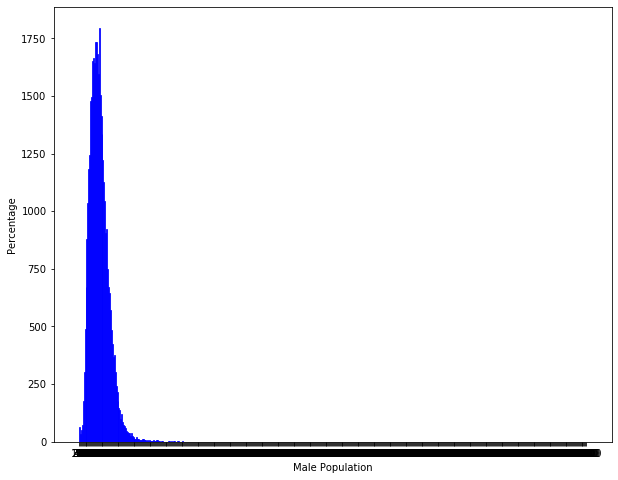

In [105]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['male_pop'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Male Population")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

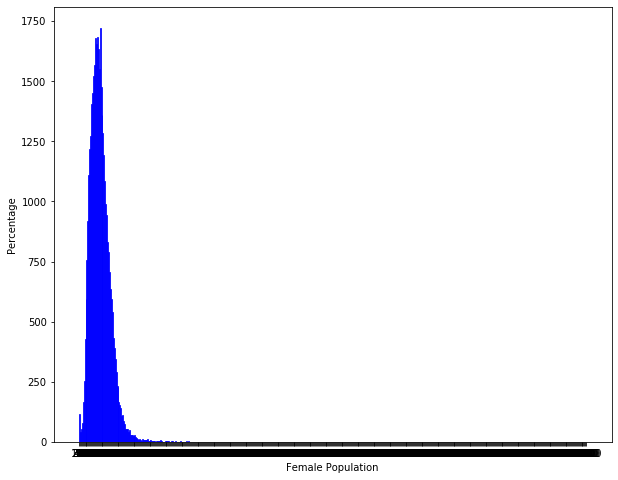

In [106]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['female_pop'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Female Population")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['male_pop'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Male Population")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

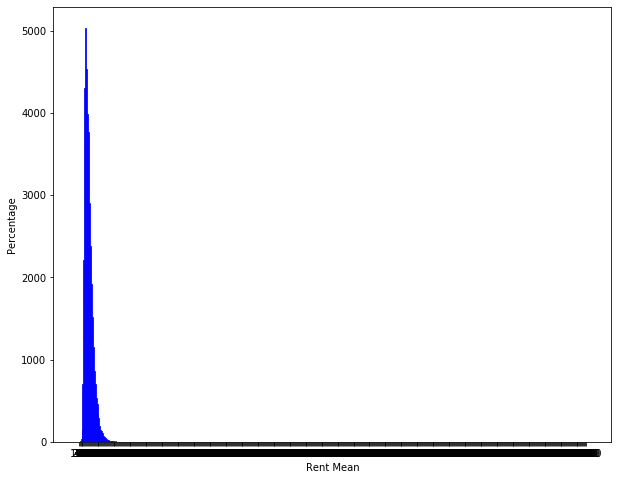

In [108]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['rent_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Rent Mean")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

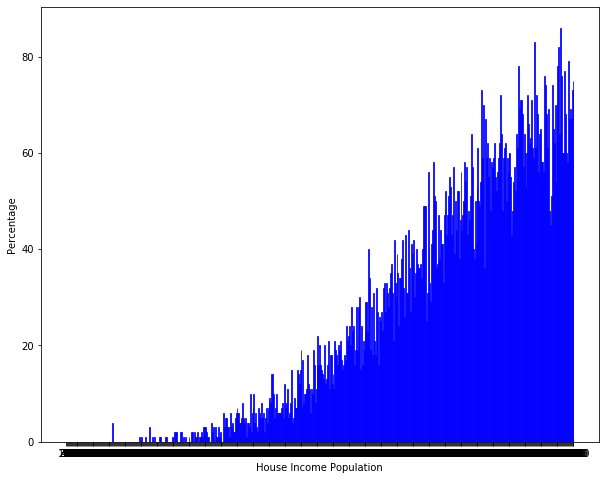

In [109]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hi_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("House Income Population")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

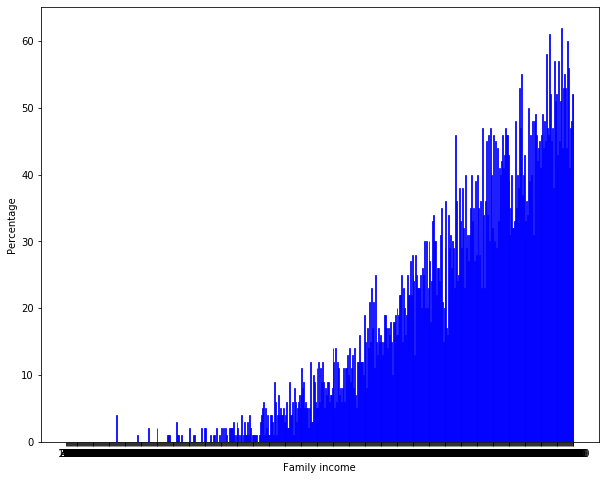

In [111]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['family_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Family income")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

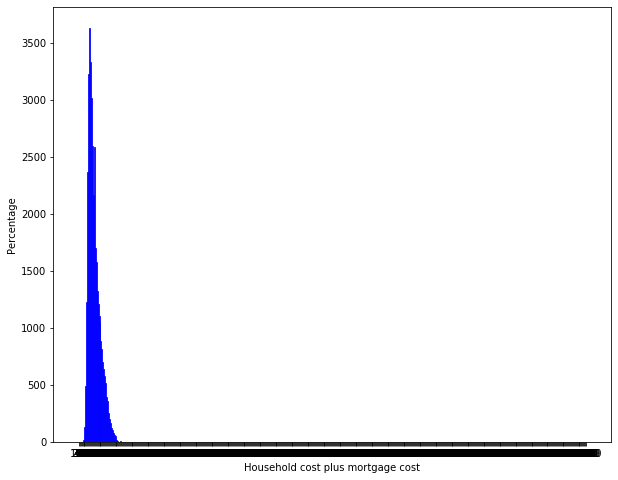

In [112]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hc_mortgage_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Household cost plus mortgage cost")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

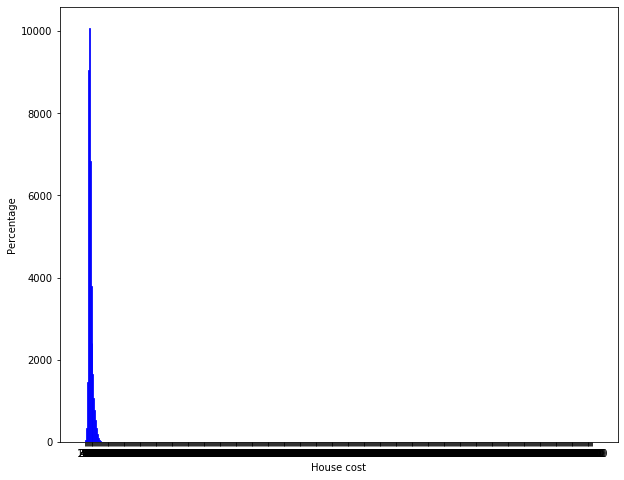

In [113]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hc_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("House cost")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

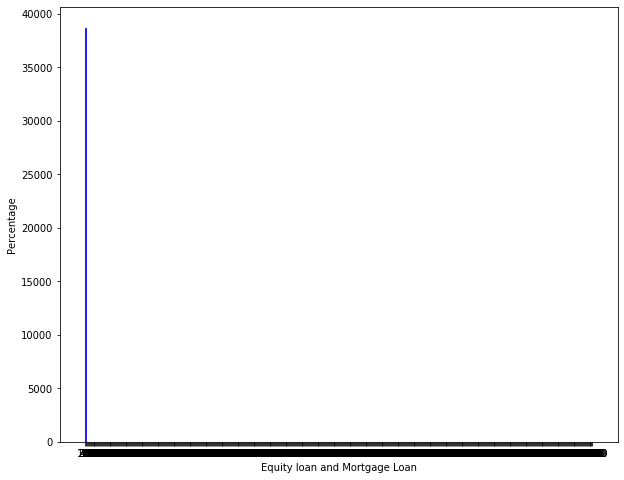

In [114]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['home_equity_second_mortgage'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Equity loan and Mortgage Loan")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

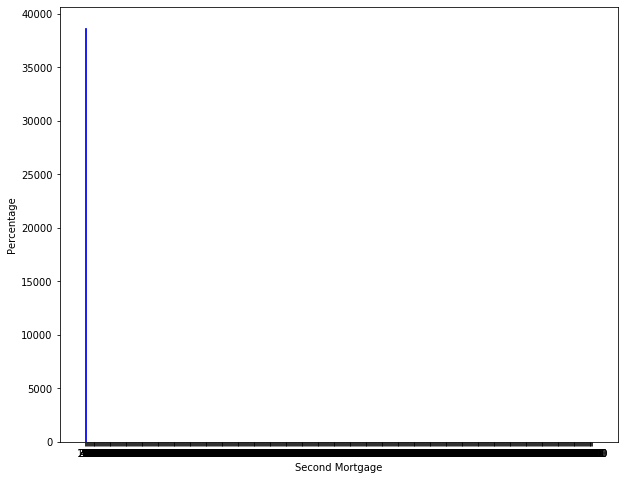

In [115]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['second_mortgage'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Second Mortgage")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

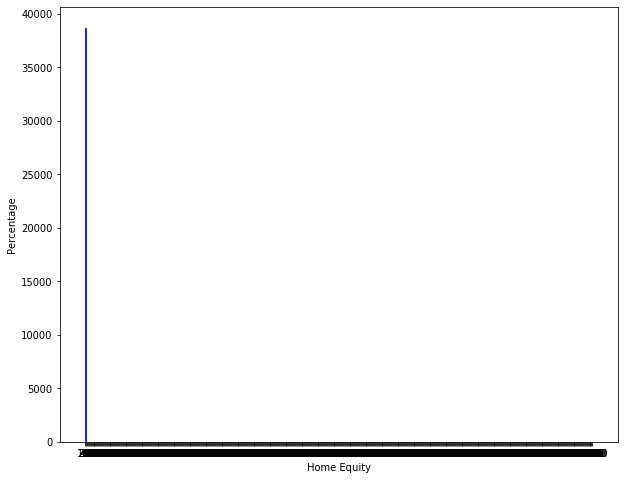

In [116]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['home_equity'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Home Equity")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

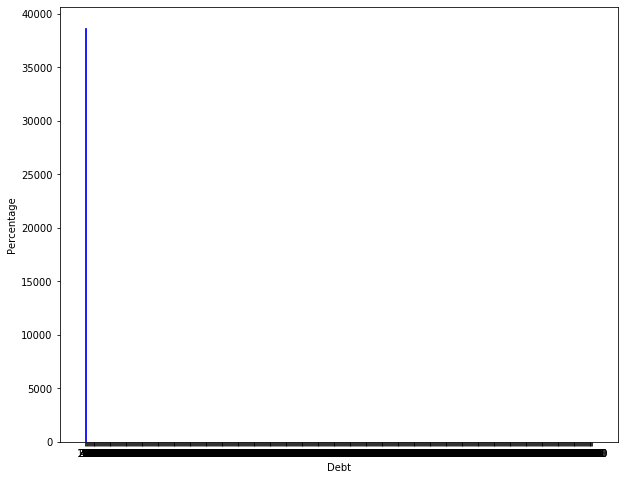

In [117]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['debt'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Debt")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

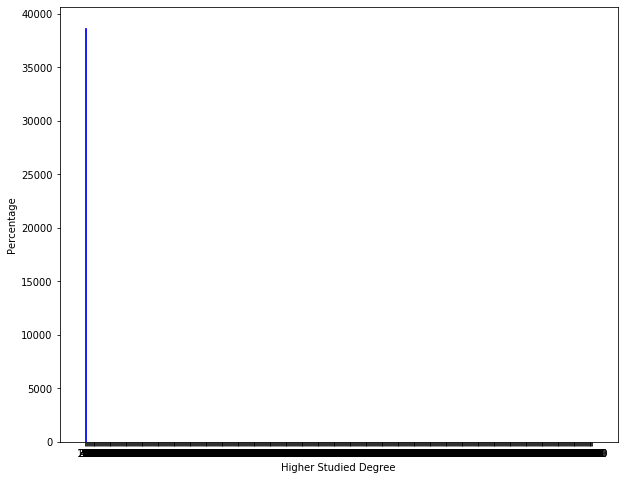

In [119]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hs_degree'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Higher Studied Degree")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

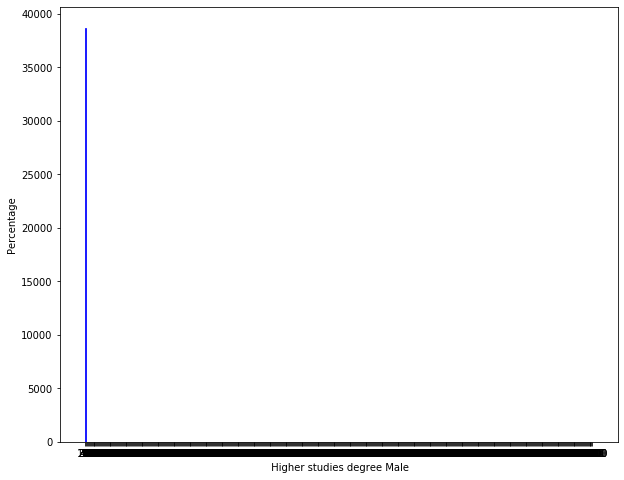

In [120]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hs_degree_male'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel(" Higher studies degree Male")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

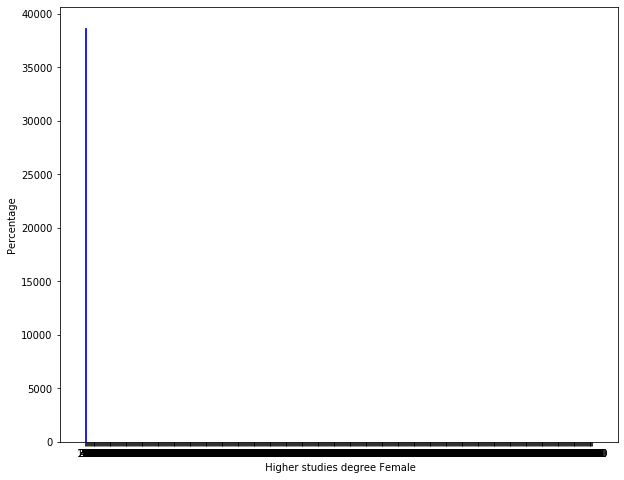

In [121]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['hs_degree_female'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel(" Higher studies degree Female")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

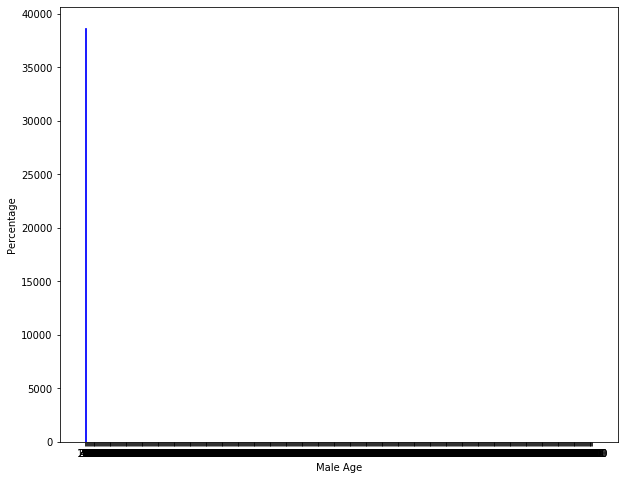

In [122]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['male_age_mean'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Male Age")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

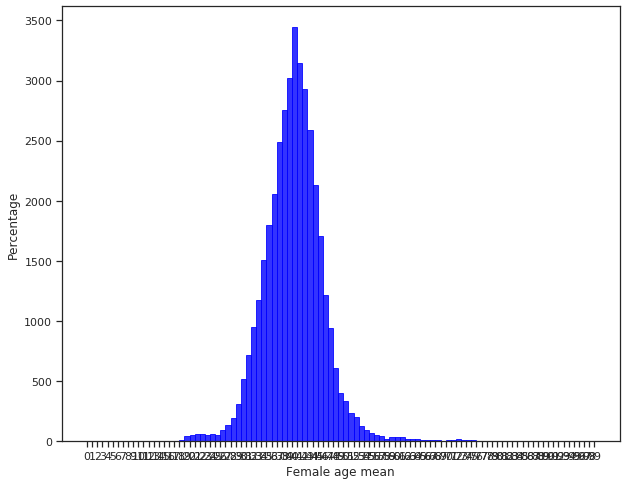

In [174]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['female_age_mean'].values.tolist()
bins = np.arange(0, 100, 1)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Female age mean")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

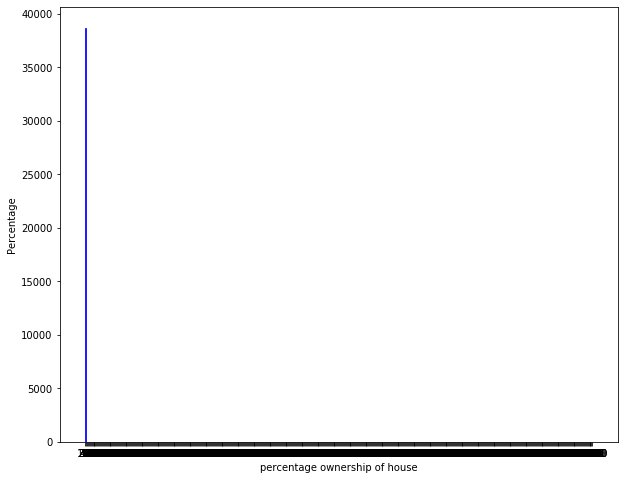

In [124]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['pct_own'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("percentage ownership of house")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

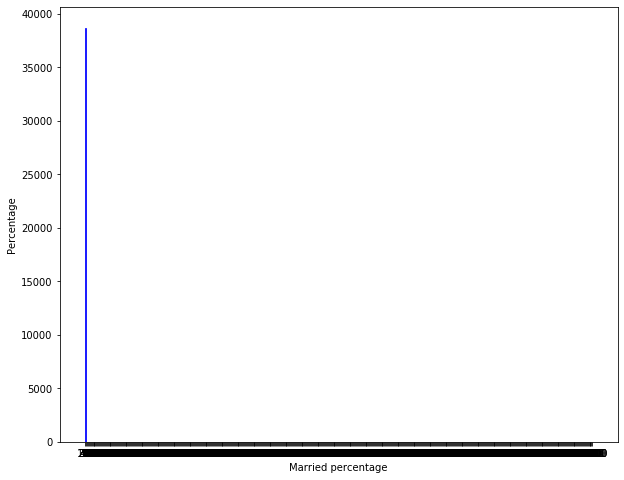

In [125]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['married'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Married percentage")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

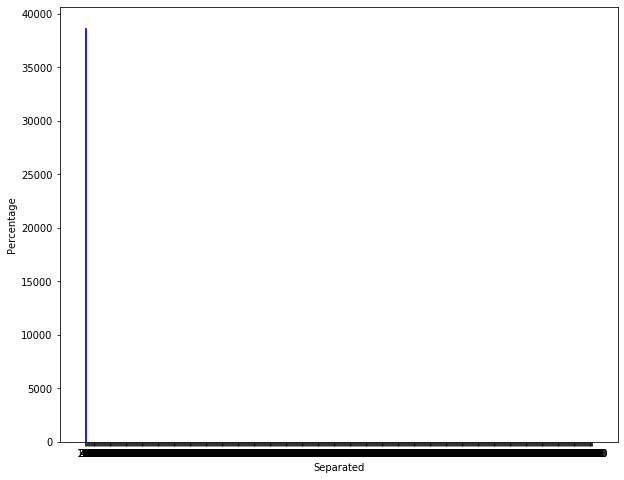

In [126]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['separated'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("Separated")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

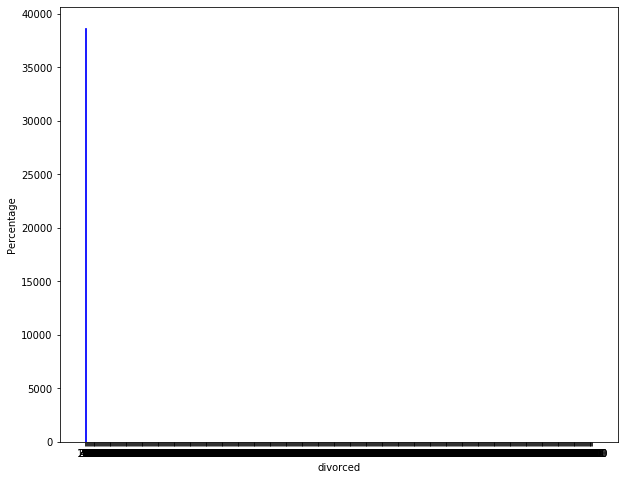

In [127]:
import numpy as np
import matplotlib.pyplot as plt


#x = df_filtered['pop']
x = df_filtered.toPandas()['divorced'].values.tolist()
bins = np.arange(0, 54000, 100.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='blue')

plt.xlabel("divorced")
plt.ylabel('Percentage')
plt.xticks(bins)
plt.show()

### Box Plot

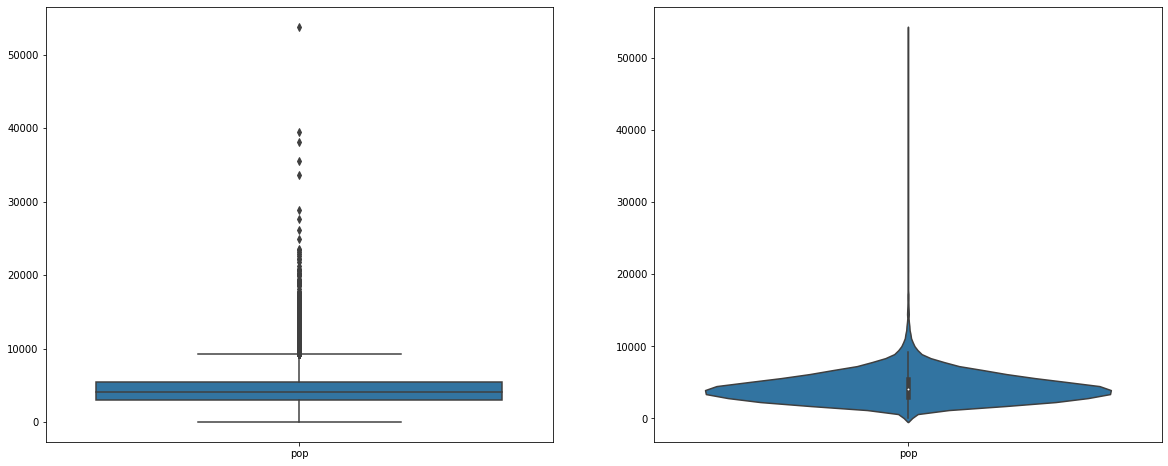

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('pop').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

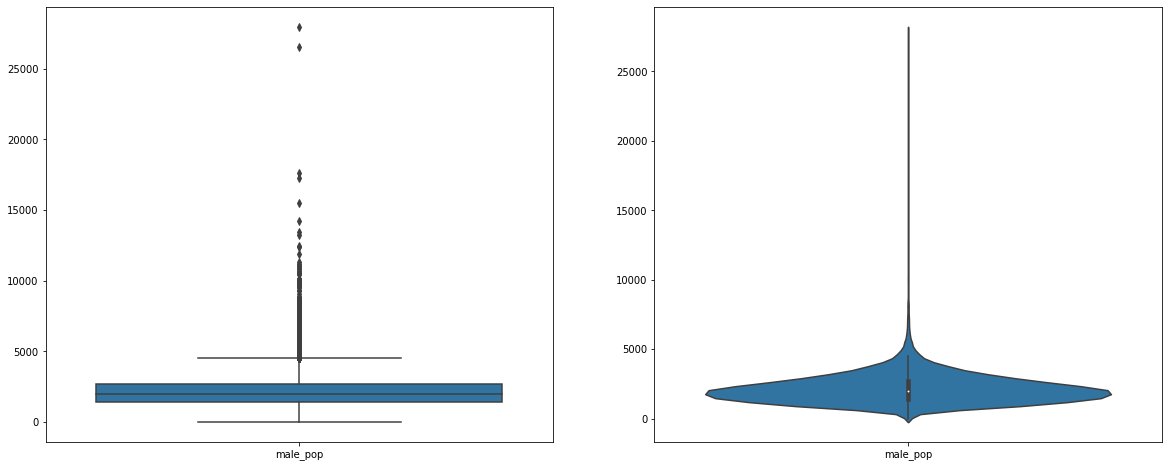

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('male_pop').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

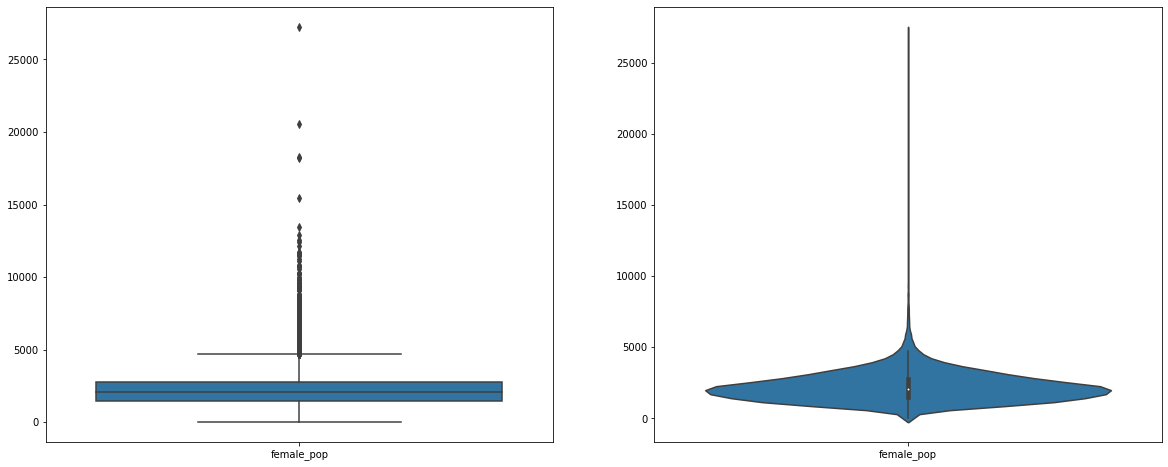

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('female_pop').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

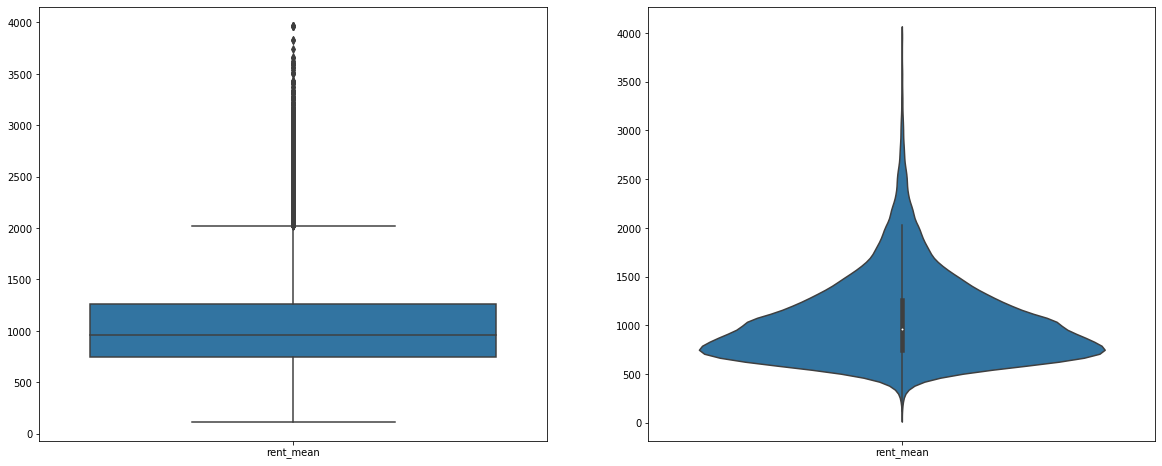

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('rent_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

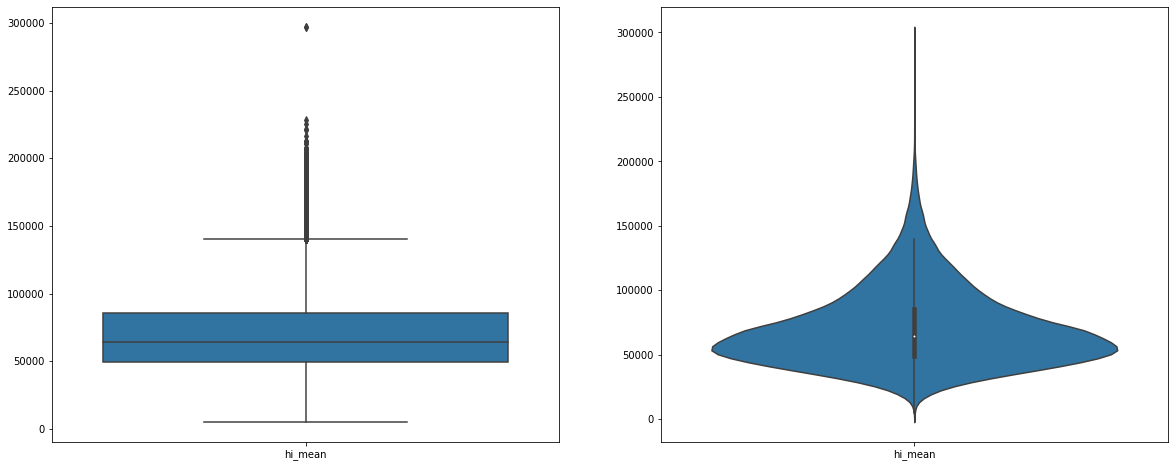

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hi_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

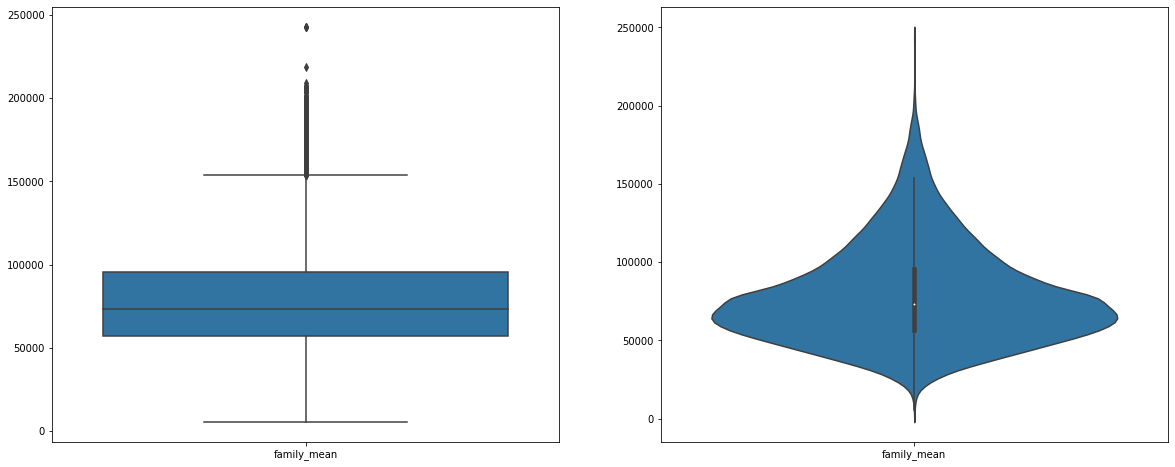

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('family_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

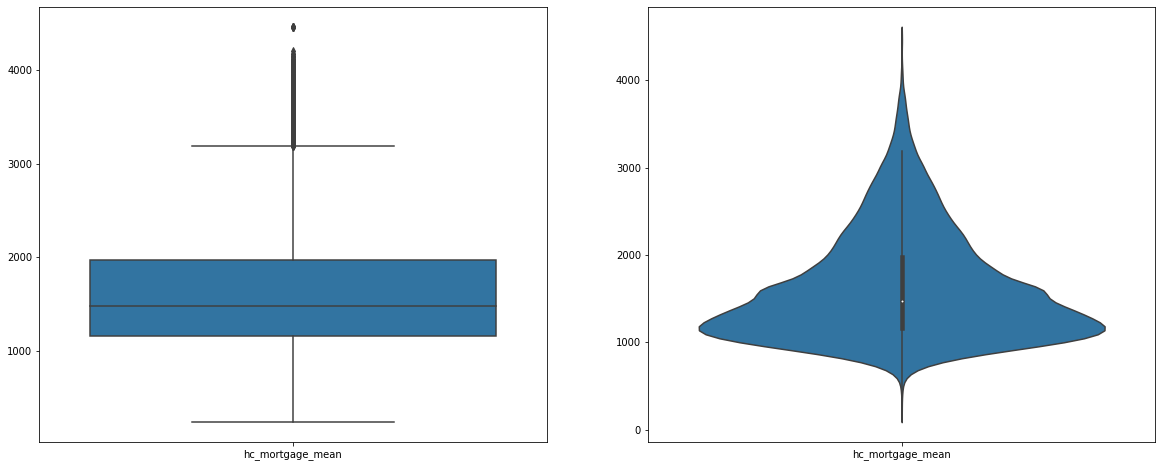

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hc_mortgage_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

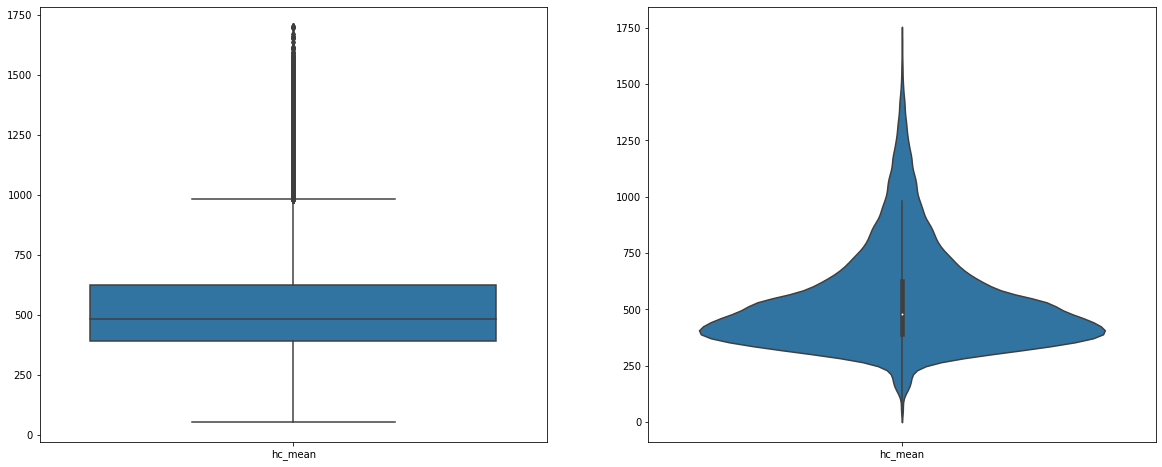

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hc_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

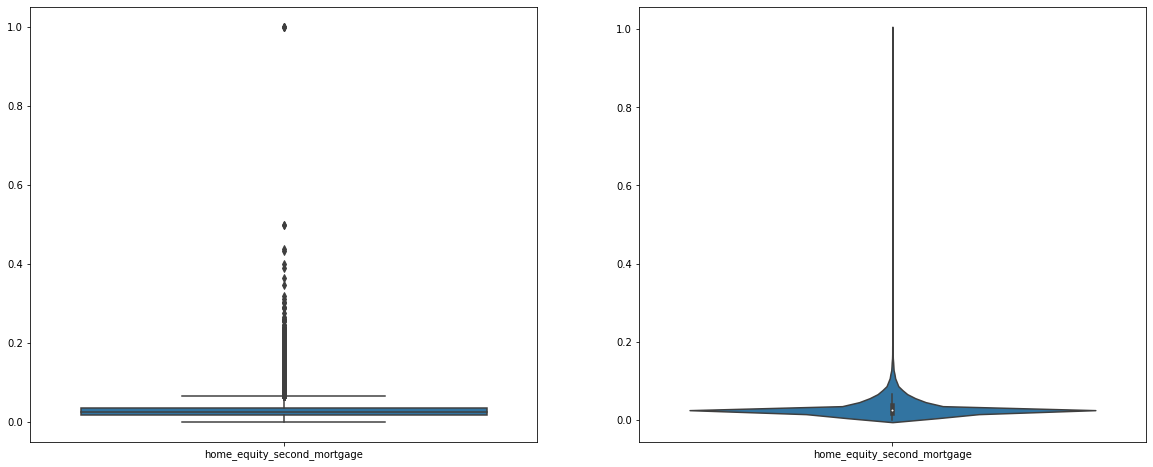

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('home_equity_second_mortgage').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

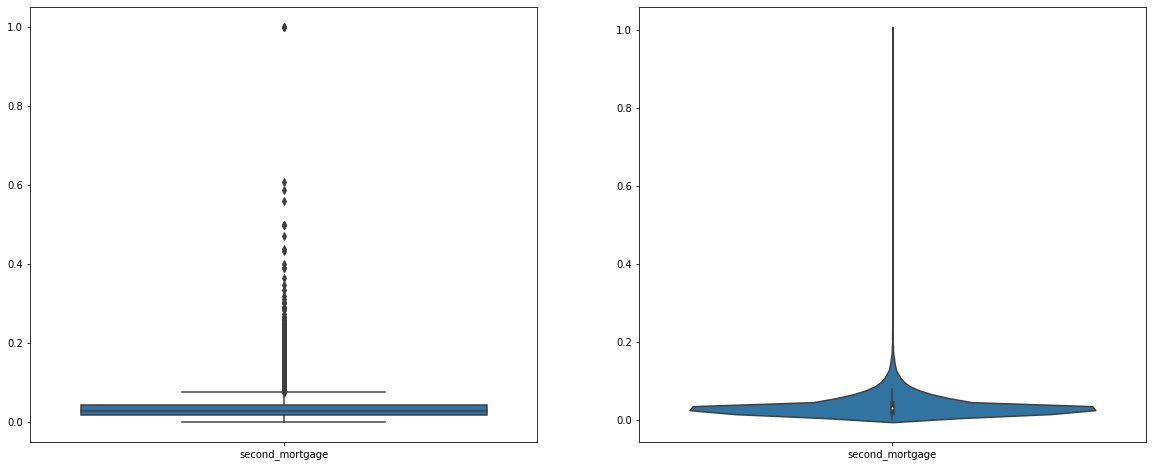

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('second_mortgage').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

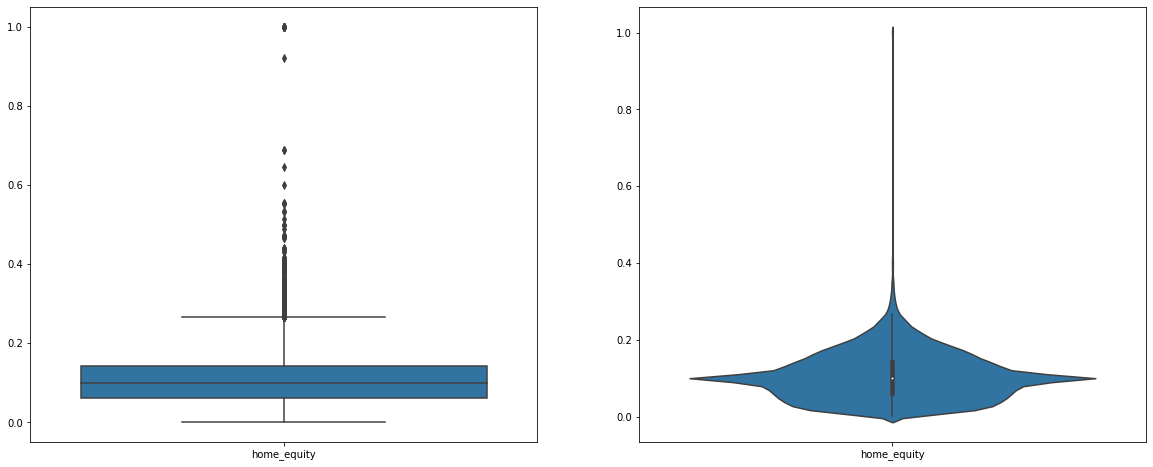

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('home_equity').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

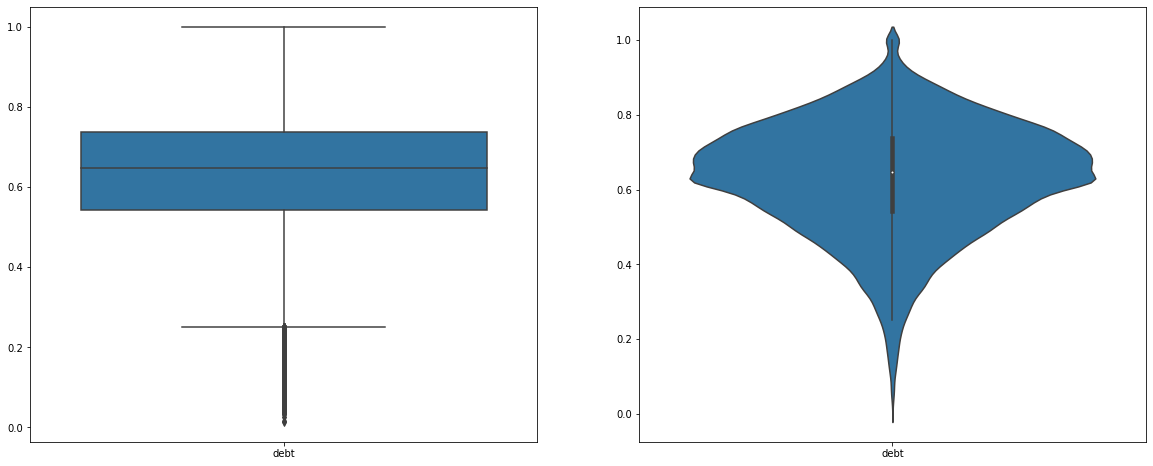

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('debt').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

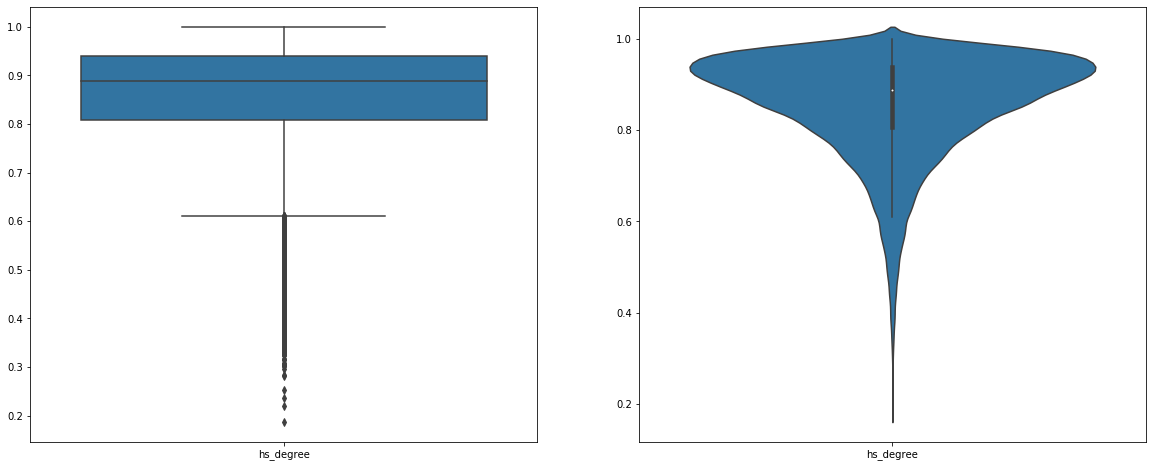

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hs_degree').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

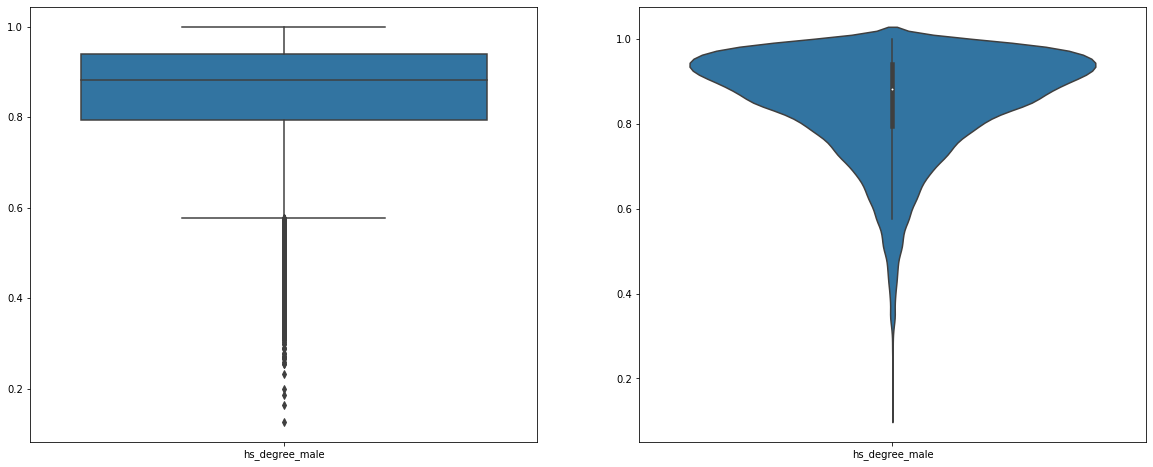

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hs_degree_male').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

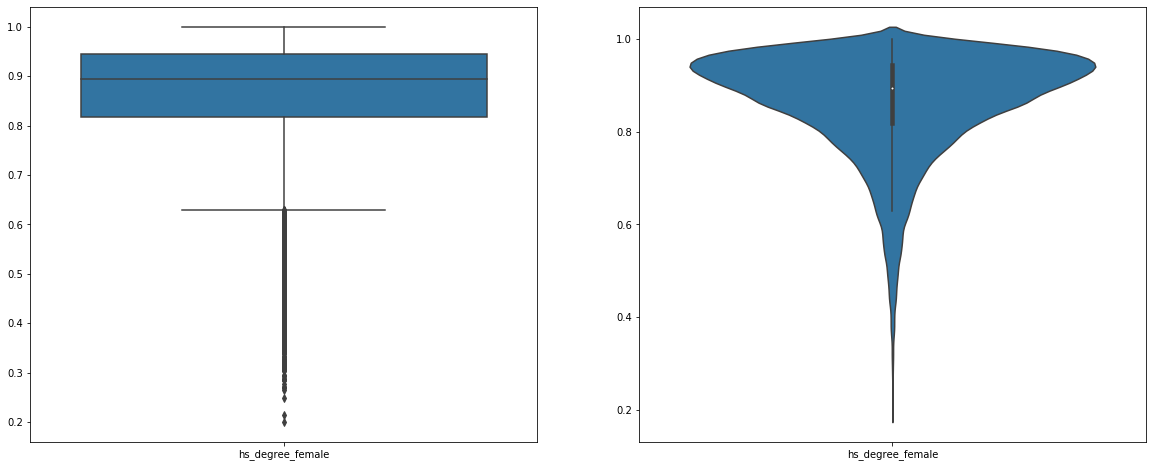

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('hs_degree_female').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

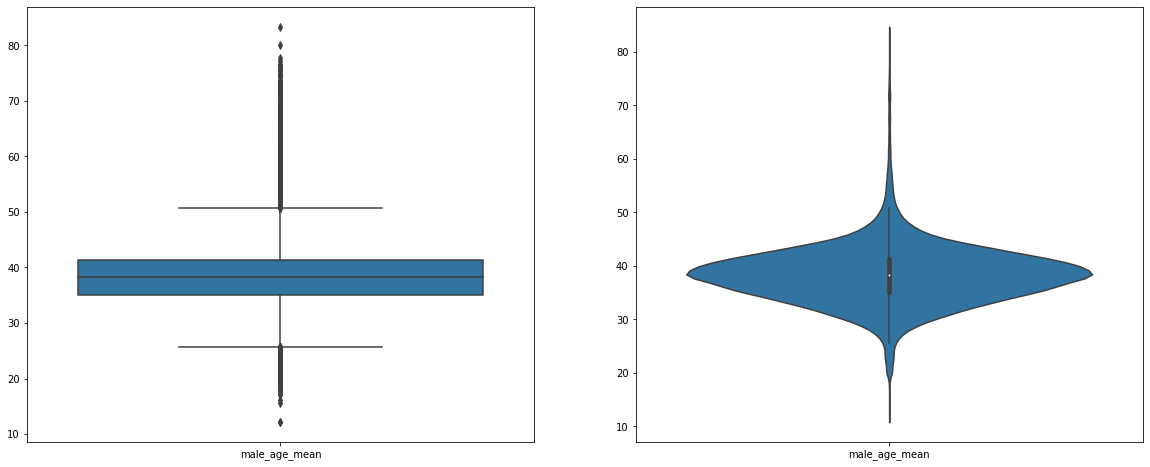

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('male_age_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

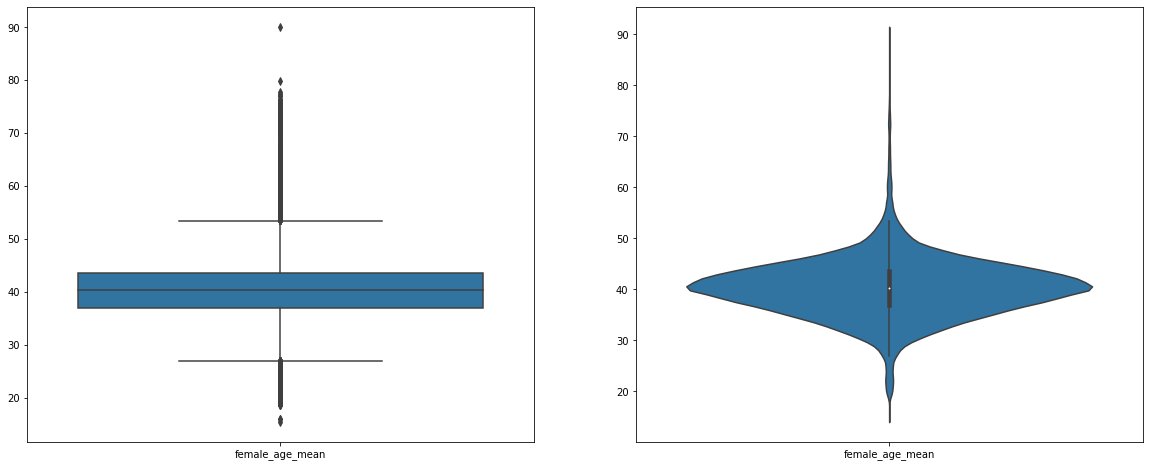

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('female_age_mean').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

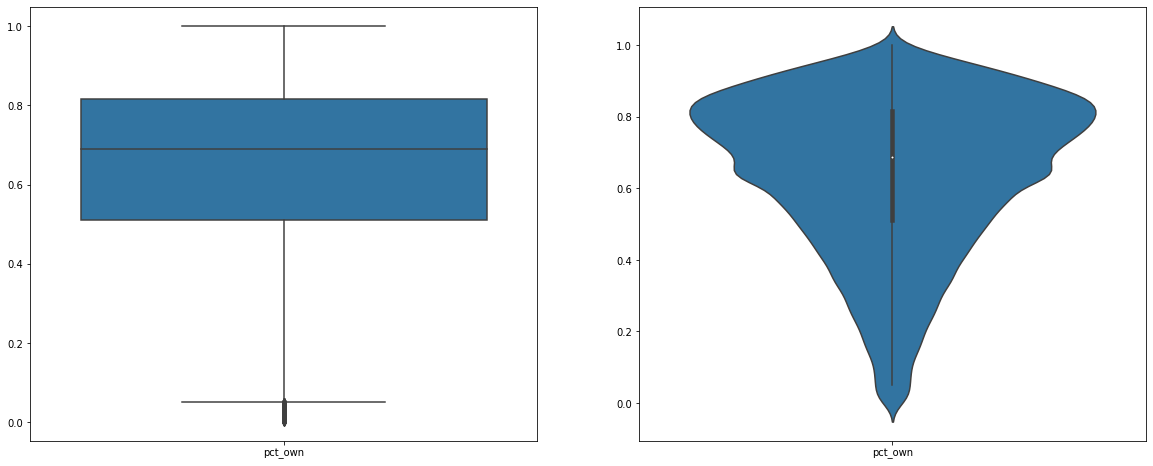

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('pct_own').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

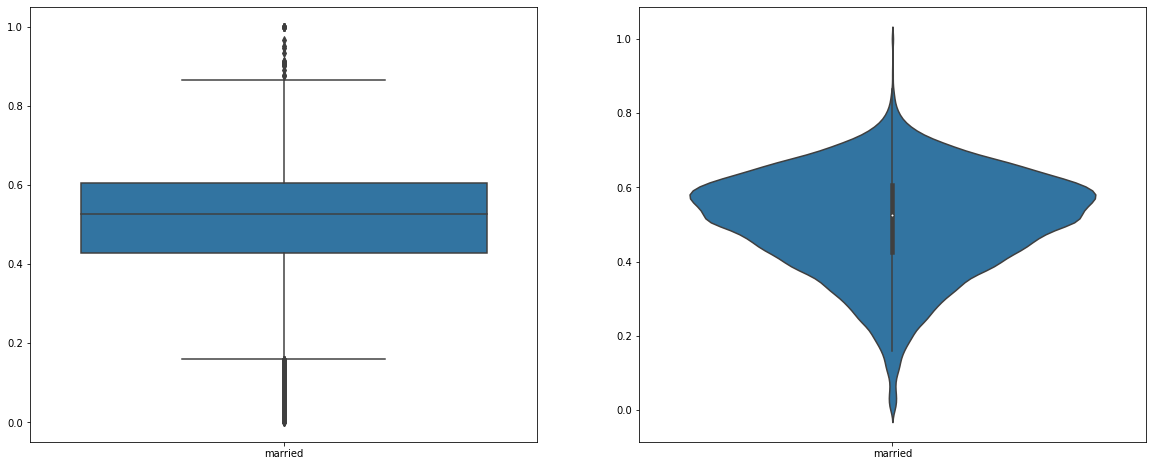

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('married').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

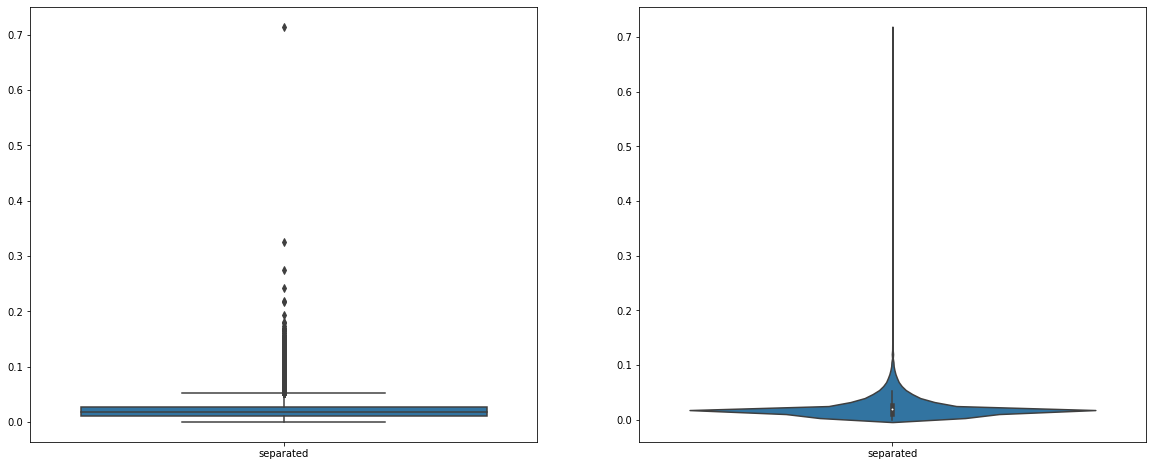

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('separated').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

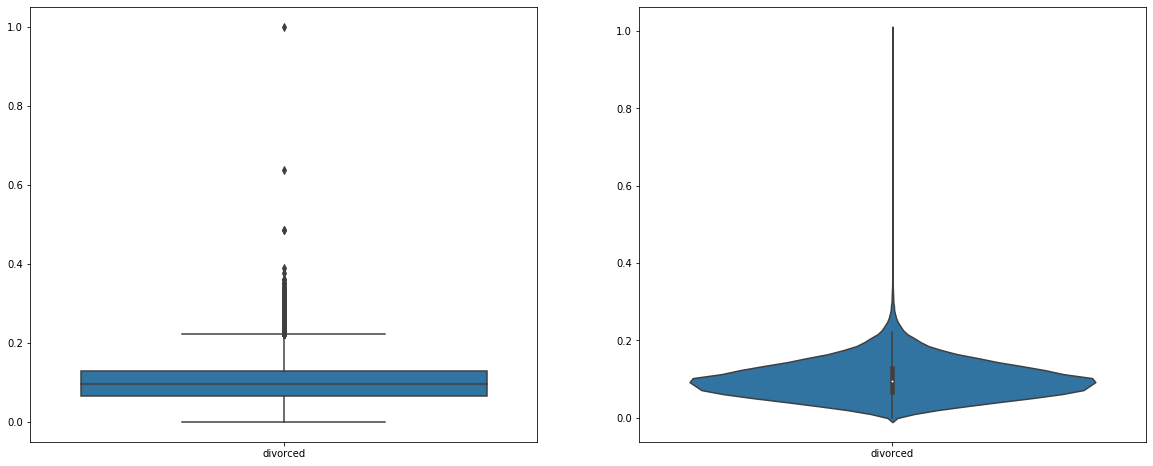

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_filtered.select('divorced').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

### Multivariant Analysis

### Correlation

In [152]:
import six
for i in df_filtered.columns:
    if not( isinstance(df_filtered.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to rent_mean for ", i, df_filtered.stat.corr('rent_mean',i))

Correlation to rent_mean for  lat 0.0030812775019517197
Correlation to rent_mean for  lng -0.16725953964770007
Correlation to rent_mean for  ALand -0.07159688914509205
Correlation to rent_mean for  AWater -0.009885280953300454
Correlation to rent_mean for  pop 0.1628590150595818
Correlation to rent_mean for  male_pop 0.15919802450750484
Correlation to rent_mean for  female_pop 0.16085487271966195
Correlation to rent_mean for  rent_mean 1.0
Correlation to rent_mean for  hi_mean 0.756261409241335
Correlation to rent_mean for  family_mean 0.7043059857618401
Correlation to rent_mean for  hc_mortgage_mean 0.7539786178578622
Correlation to rent_mean for  hc_mean 0.5989907501436637
Correlation to rent_mean for  home_equity_second_mortgage 0.09857716504146785
Correlation to rent_mean for  second_mortgage 0.12047017730816342
Correlation to rent_mean for  home_equity 0.39921346915161754
Correlation to rent_mean for  debt 0.44777012880650985
Correlation to rent_mean for  hs_degree 0.3619653076622

In [153]:
import six
for i in df_filtered.columns:
    if not( isinstance(df_filtered.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to rent_mean for ", i, df_filtered.stat.corr('pop',i))

Correlation to rent_mean for  lat -0.08469263637806448
Correlation to rent_mean for  lng -0.0825558701019436
Correlation to rent_mean for  ALand -0.03330068997402416
Correlation to rent_mean for  AWater -0.014545819889969759
Correlation to rent_mean for  pop 1.0
Correlation to rent_mean for  male_pop 0.9801999467625149
Correlation to rent_mean for  female_pop 0.980708228593424
Correlation to rent_mean for  rent_mean 0.1628590150595818
Correlation to rent_mean for  hi_mean 0.17375675106133262
Correlation to rent_mean for  family_mean 0.13518017207613095
Correlation to rent_mean for  hc_mortgage_mean 0.11257824063110912
Correlation to rent_mean for  hc_mean 0.05768718958713523
Correlation to rent_mean for  home_equity_second_mortgage 0.0405133285698125
Correlation to rent_mean for  second_mortgage 0.039337440726892235
Correlation to rent_mean for  home_equity 0.08231828127874082
Correlation to rent_mean for  debt 0.25042923280792895
Correlation to rent_mean for  hs_degree 0.0499729651902

In [155]:
import six
for i in df_filtered.columns:
    if not( isinstance(df_filtered.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to rent_mean for ", i, df_filtered.stat.corr('family_mean',i))

Correlation to rent_mean for  lat 0.15853977520238763
Correlation to rent_mean for  lng -0.030576446846526443
Correlation to rent_mean for  ALand -0.030082507789865112
Correlation to rent_mean for  AWater -0.004993005567572676
Correlation to rent_mean for  pop 0.13518017207613092
Correlation to rent_mean for  male_pop 0.13467382826206023
Correlation to rent_mean for  female_pop 0.13105499714349725
Correlation to rent_mean for  rent_mean 0.7043059857618401
Correlation to rent_mean for  hi_mean 0.9624338882736144
Correlation to rent_mean for  family_mean 1.0
Correlation to rent_mean for  hc_mortgage_mean 0.7623053194160581
Correlation to rent_mean for  hc_mean 0.6905724697756214
Correlation to rent_mean for  home_equity_second_mortgage -0.015332334865844136
Correlation to rent_mean for  second_mortgage -0.0012994062127936095
Correlation to rent_mean for  home_equity 0.41869293601052954
Correlation to rent_mean for  debt 0.3819023519443837
Correlation to rent_mean for  hs_degree 0.6385093

In [161]:
import six
for i in df_filtered.columns:
    if not( isinstance(df_filtered.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to rent_mean for ", i, df_filtered.stat.corr('debt',i))

Correlation to rent_mean for  lat 0.1874419331767571
Correlation to rent_mean for  lng -0.12176727215455184
Correlation to rent_mean for  ALand -0.12657286224672215
Correlation to rent_mean for  AWater -0.04313470627691675
Correlation to rent_mean for  pop 0.2504292328079289
Correlation to rent_mean for  male_pop 0.2417522653843089
Correlation to rent_mean for  female_pop 0.25015410002297117
Correlation to rent_mean for  rent_mean 0.44777012880650974
Correlation to rent_mean for  hi_mean 0.42254692213114703
Correlation to rent_mean for  family_mean 0.3819023519443837
Correlation to rent_mean for  hc_mortgage_mean 0.40278869569321213
Correlation to rent_mean for  hc_mean 0.29832207349314727
Correlation to rent_mean for  home_equity_second_mortgage 0.271734786261604
Correlation to rent_mean for  second_mortgage 0.28952349299652086
Correlation to rent_mean for  home_equity 0.4848119734174926
Correlation to rent_mean for  debt 1.0
Correlation to rent_mean for  hs_degree 0.2777291759875401


In [162]:
import six
for i in df_filtered.columns:
    if not( isinstance(df_filtered.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to rent_mean for ", i, df_filtered.stat.corr('hs_degree',i))

Correlation to rent_mean for  lat 0.2419203474554308
Correlation to rent_mean for  lng 0.05296710918198305
Correlation to rent_mean for  ALand -0.002364806834187548
Correlation to rent_mean for  AWater 0.003087861852193015
Correlation to rent_mean for  pop 0.04997296519025714
Correlation to rent_mean for  male_pop 0.03247199548555557
Correlation to rent_mean for  female_pop 0.06482044995593544
Correlation to rent_mean for  rent_mean 0.36196530766222007
Correlation to rent_mean for  hi_mean 0.5830307924712846
Correlation to rent_mean for  family_mean 0.6385093785539935
Correlation to rent_mean for  hc_mortgage_mean 0.3357074830977422
Correlation to rent_mean for  hc_mean 0.36262484373308046
Correlation to rent_mean for  home_equity_second_mortgage -0.025102428099284365
Correlation to rent_mean for  second_mortgage -0.02590647517986081
Correlation to rent_mean for  home_equity 0.2873134077506794
Correlation to rent_mean for  debt 0.27772917598754004
Correlation to rent_mean for  hs_degre

### Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

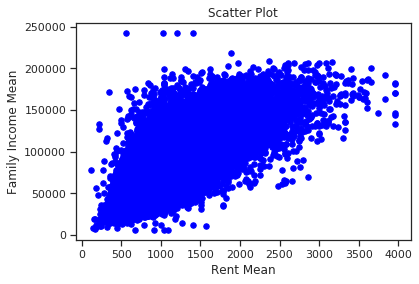

In [166]:
x1 = df_filtered.toPandas()['rent_mean'].values.tolist()
y1 = df_filtered.toPandas()['family_mean'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('Rent Mean')
plt.ylabel('Family Income Mean')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

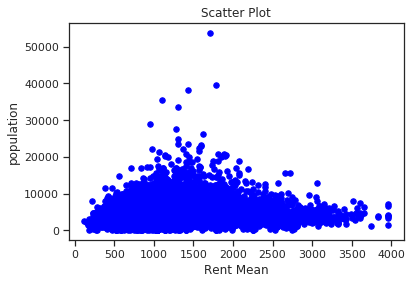

In [165]:
x1 = df_filtered.toPandas()['rent_mean'].values.tolist()
y1 = df_filtered.toPandas()['pop'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('Rent Mean')
plt.ylabel('population')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

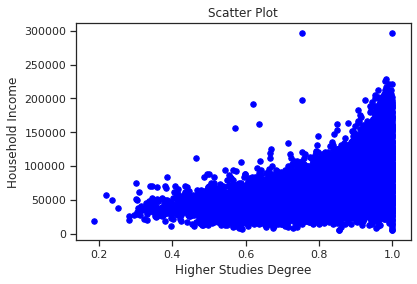

In [168]:
x1 = df_filtered.toPandas()['hs_degree'].values.tolist()
y1 = df_filtered.toPandas()['hi_mean'].values.tolist()
plt.scatter(x1, y1, color='blue', s=30)
plt.xlabel('Higher Studies Degree')
plt.ylabel('Household Income')
plt.title('Scatter Plot')

### pair plot

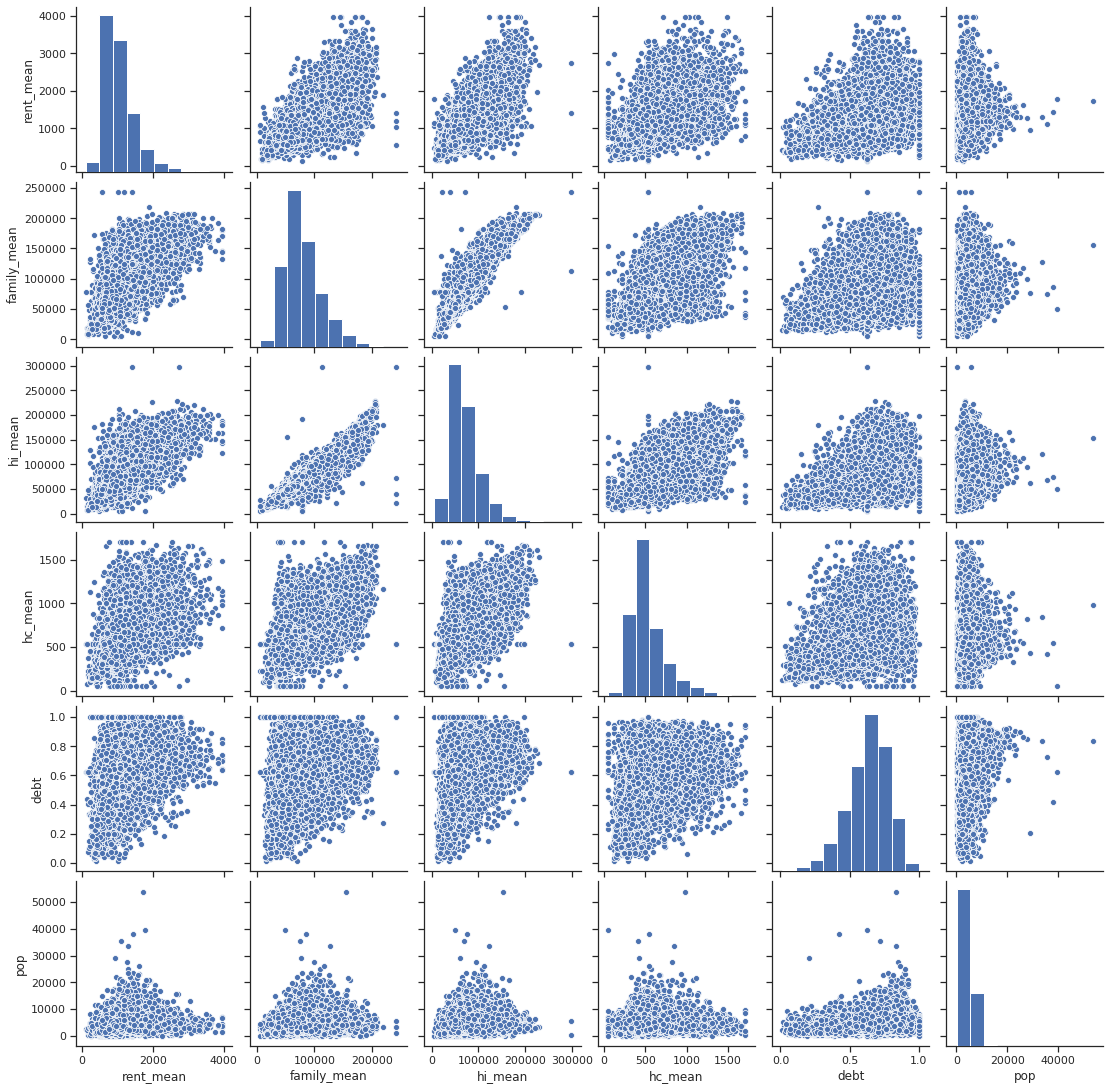

In [171]:
df_scatter_plot =df_filtered.select('rent_mean','family_mean','hi_mean','hc_mean','debt','pop')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

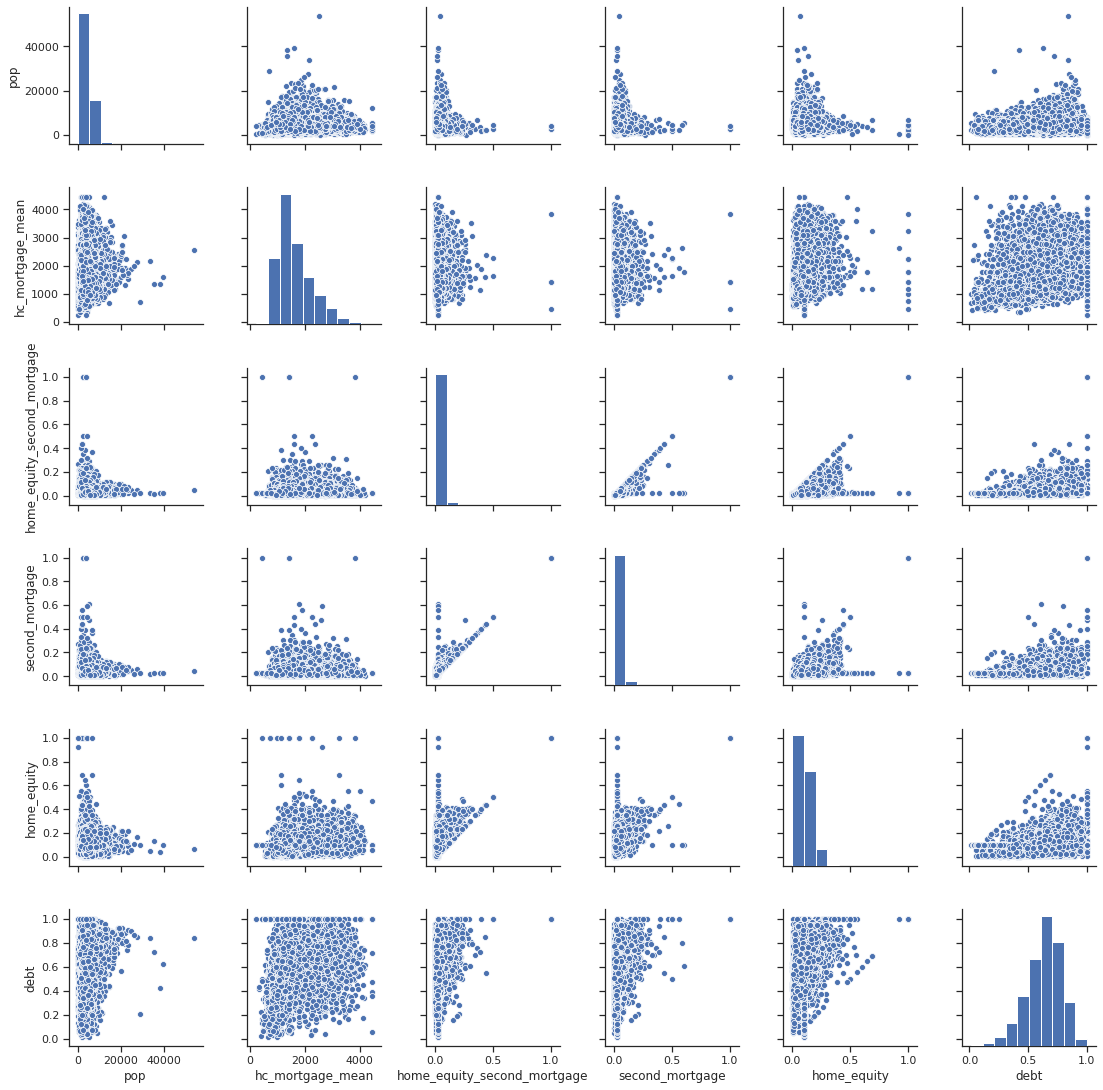

In [178]:
df_scatter_plot =df_filtered.select('pop','hc_mortgage_mean','home_equity_second_mortgage','second_mortgage','home_equity','debt')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

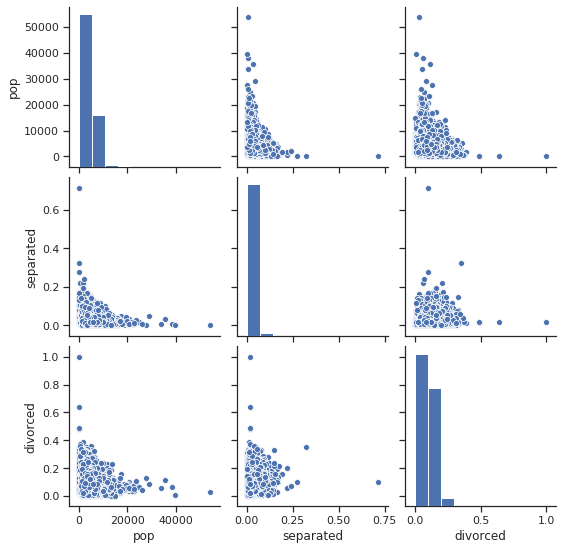

In [181]:
df_scatter_plot =df_filtered.select('pop','separated','divorced')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

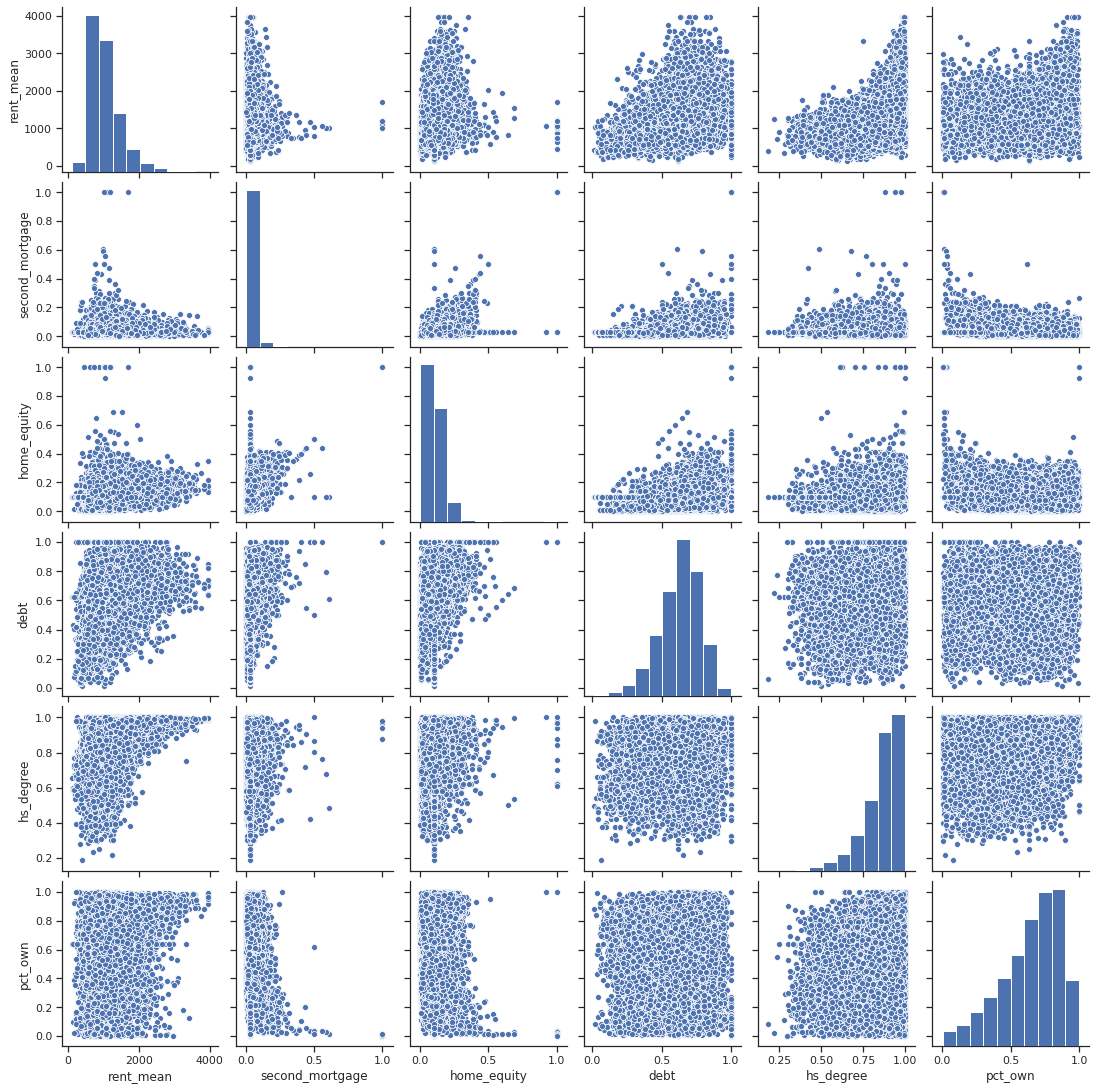

In [182]:
df_scatter_plot =df_filtered.select('rent_mean','second_mortgage','home_equity','debt','hs_degree','pct_own')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

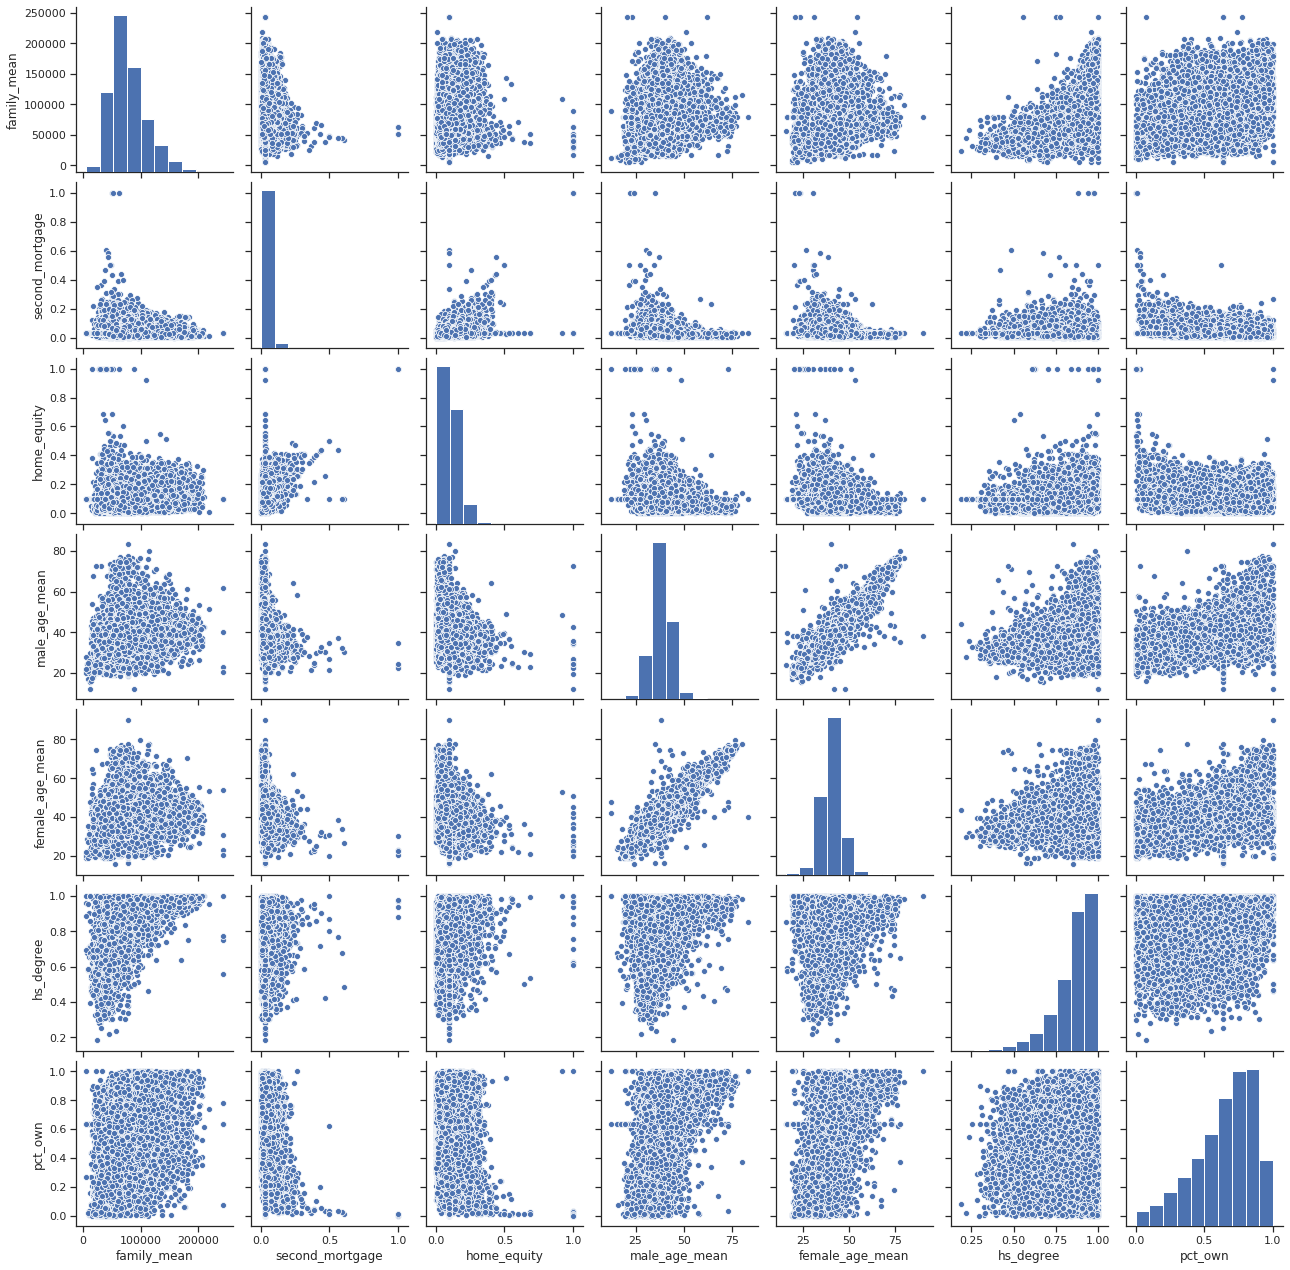

In [184]:
df_scatter_plot =df_filtered.select('family_mean','second_mortgage','home_equity','male_age_mean','female_age_mean','hs_degree','pct_own')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

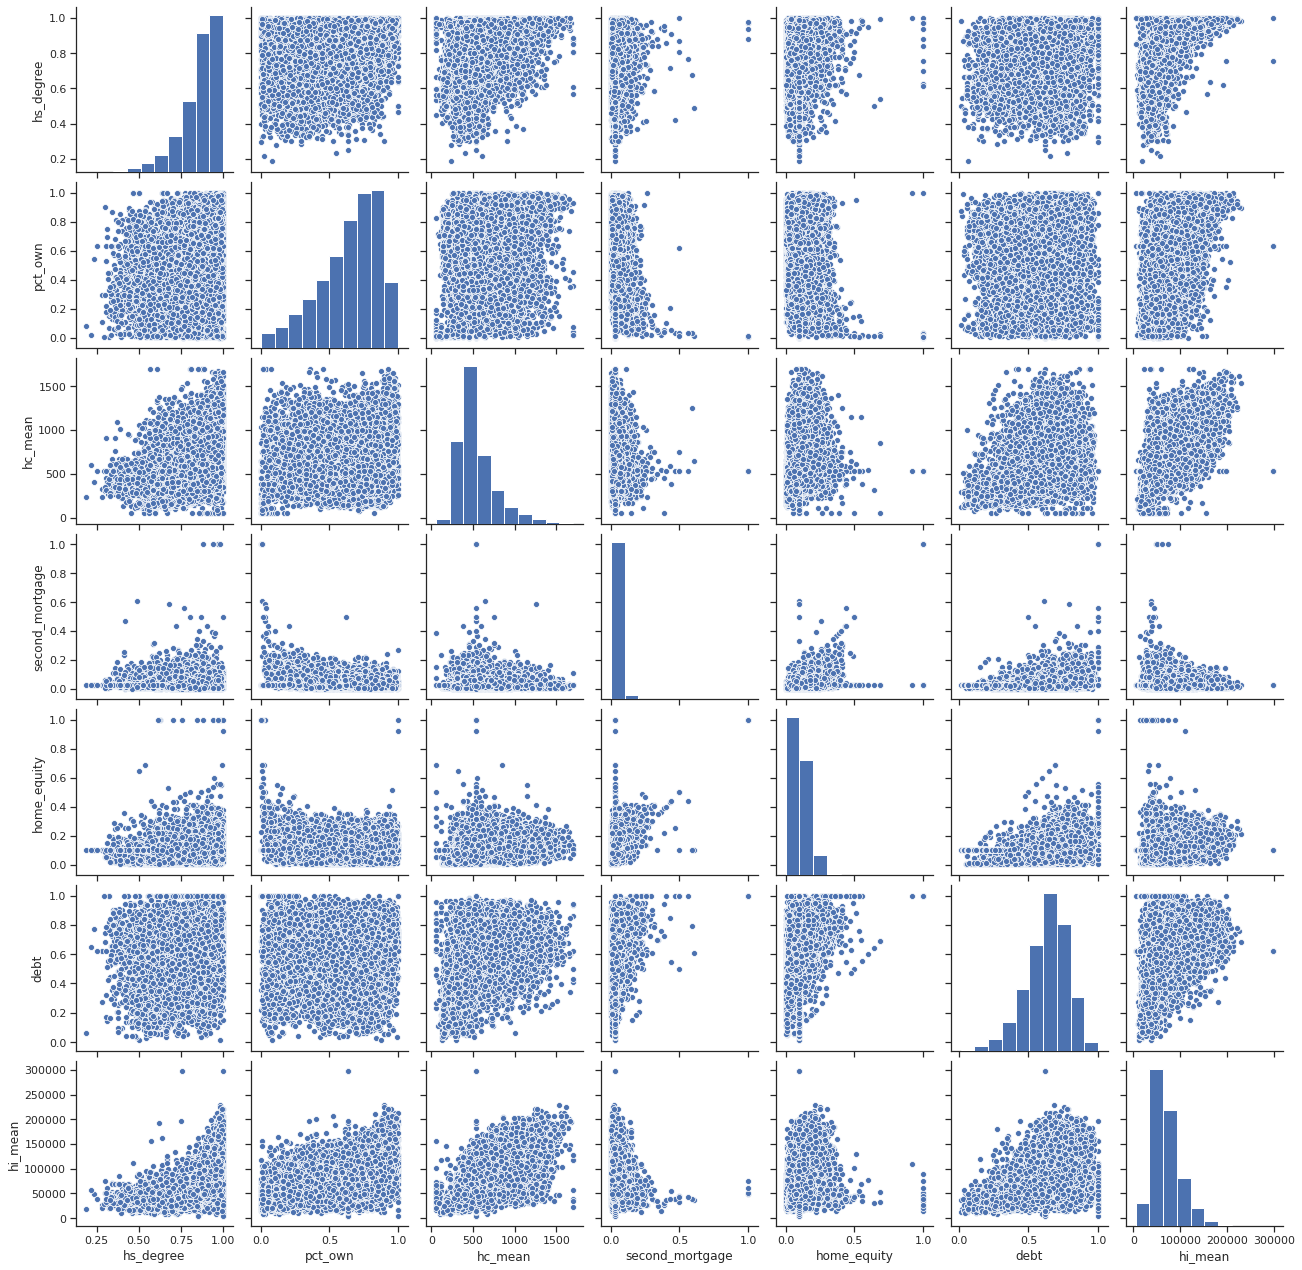

In [186]:
df_scatter_plot =df_filtered.select('hs_degree','pct_own','hc_mean','second_mortgage','home_equity','debt','hi_mean')

import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
sns.pairplot(df_scatter_plot.toPandas())
plt.show()

### Correlation Matrix

In [160]:
df_filtered_num = df_filtered = df_filtered.drop('city','place','type','state')
from pyspark.mllib.stat import Statistics
import pandas as pd

corr_data = df_filtered_num.select(df_filtered.columns)

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                                  lat       lng     ALand    AWater       pop  male_pop  female_pop  rent_mean   hi_mean  family_mean  hc_mortgage_mean   hc_mean  home_equity_second_mortgage  second_mortgage  home_equity      debt  hs_degree  hs_degree_male  hs_degree_female  male_age_mean  female_age_mean   pct_own   married  separated  divorced
lat                          1.000000  0.016597  0.096512  0.068605 -0.084693 -0.078942   -0.087143   0.003081  0.135464     0.158540          0.103967  0.220807                     0.028534         0.031208     0.173697  0.187442   0.241920        0.230817          0.237396      -0.001090        -0.009688  0.059235  0.041529  -0.133976 -0.062394
lng                          0.016597  1.000000 -0.103957 -0.066076 -0.082556 -0.100318   -0.061673  -0.167260 -0.059179    -0.030576         -0.093169  0.152501                    -0.092704        -0.096526    -0.001411 -0.121767   0.052967        0.032808          0.068969       0.083194         0.1

## Machine Learning

### linear regression

In [8]:
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

In [3]:
df_filtered = spark.read.option('header','true').option('inferSchema','true').csv("mean_fill_dataset_new.csv")

In [4]:
from pyspark.ml.feature import VectorAssembler
data2 = df_filtered.select(df_filtered.rent_mean,df_filtered.family_mean.alias('label'))
train, test = data2.randomSplit([0.7,0.3])
assembler = VectorAssembler().setInputCols(['rent_mean',]).setOutputCol('features')
train01 = assembler.transform(train)
''' we only need features and label column '''
train02 = train01.select("features","label")
train02.show(truncate=False)

+-----------+------------+
|features   |label       |
+-----------+------------+
|[147.5481] |8725.80658  |
|[172.725]  |19414.83729 |
|[181.7723] |56197.76363 |
|[186.70202]|11950.5278  |
|[218.78415]|14311.34755 |
|[224.5]    |127218.56951|
|[232.18411]|18962.67058 |
|[233.43589]|10706.2618  |
|[236.80179]|11887.84042 |
|[236.943]  |12256.28786 |
|[237.90707]|31542.99902 |
|[244.81654]|10826.44645 |
|[245.61748]|13172.22162 |
|[255.05874]|27346.52613 |
|[261.66524]|22152.90647 |
|[263.51021]|23394.99095 |
|[263.55309]|26823.47547 |
|[268.25262]|15960.91515 |
|[268.56819]|28864.69211 |
|[268.82751]|21805.84134 |
+-----------+------------+
only showing top 20 rows



In [5]:
# Import LinearRegression class
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(train02)
test01 = assembler.transform(test)
test02 = test01.select('features', 'label')
test03 = model.transform(test02)
test03.show(truncate=False)

+-----------+-----------------+------------------+
|features   |label            |prediction        |
+-----------+-----------------+------------------+
|[117.15]   |78370.33168289994|31581.065553760563|
|[159.13436]|19242.02238      |33709.04918546362 |
|[166.08536]|7581.09788       |34061.36167096937 |
|[180.14139]|9663.8382        |34773.79367580943 |
|[205.38889]|48007.13653      |36053.46702896815 |
|[217.49822]|17785.85102      |36667.23025010314 |
|[224.5]    |133435.40993     |37022.116527583275|
|[231.07822]|24785.09895      |37355.534602450716|
|[234.28539]|17566.78194      |37518.09049860083 |
|[248.75785]|36466.28965      |38251.62932092603 |
|[274.19986]|62551.32242      |39541.161442831086|
|[274.5]    |78370.33168289994|39556.37408409129 |
|[283.80307]|50439.69921      |40027.90159301575 |
|[286.39635]|35473.30454      |40159.34238173857 |
|[288.66575]|16915.91101      |40274.36726371336 |
|[295.03553]|19581.68005      |40597.22052567923 |
|[296.4801] |20153.21926      |

In [6]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test03,{evaluator.metricName: "r2"}))

0.4997781471644356


In [7]:
print(evaluator.evaluate(test03,{evaluator.metricName: "mse"}))
print(evaluator.evaluate(test03,{evaluator.metricName: "rmse"}))
print(evaluator.evaluate(test03,{evaluator.metricName: "mae"}))

487306287.14722204
22075.014997666978
17117.554280893208


In [15]:
print(model.coefficients)

[50.68515113016031]


In [16]:
print(model.intercept)

25643.300098862284
